In [1]:
from geographiclib.geodesic import Geodesic
import numpy as np
import math
from openlocationcode import openlocationcode as olc
from IPython.display import display
from geopy.distance import distance as geopy_distance

OLC_CODE_PLANET = "00000000+"
OLC_EARTH_CIRCUMFERENCE = np.round(2 * np.pi * Geodesic.WGS84.a, 3)
OLC_LATITUDE_SPAN = 180.0
OLC_LATITUDE_SOUTH_POLE = -90.0
OLC_LATITUDE_EQUATOR = 0.0
OLC_LATITUDE_NORTH_POLE = 90.0
OLC_LONGITUDE_SPAN = 360.0
OLC_LONGITUDE_DATELINE_WEST = -180.0
OLC_LONGITUDE_GREENWICH = 0.0
OLC_LONGITUDE_DATELINE_EAST = 180.0

OLC_PYLON_MIDPOINT = "midpoint"
OLC_PYLON_O = OLC_PYLON_MIDPOINT
OLC_PYLON_N = "pylon_N"
OLC_PYLON_NE = "pylon_NE"
OLC_PYLON_E = "pylon_E"
OLC_PYLON_SE = "pylon_SE"
OLC_PYLON_S = "pylon_S"
OLC_PYLON_SW = "pylon_SW"
OLC_PYLON_W = "pylon_W"
OLC_PYLON_NW = "pylon_NW"
OLC_BORDER_PYLONs = [OLC_PYLON_N, OLC_PYLON_NE, OLC_PYLON_E, OLC_PYLON_SE,
                     OLC_PYLON_S, OLC_PYLON_SW, OLC_PYLON_W, OLC_PYLON_NW]
OLC_PYLONs = [OLC_PYLON_O] + OLC_BORDER_PYLONs

OLC_OFFSET_N = "offset_N"
OLC_OFFSET_NE = "offset_NE"
OLC_OFFSET_E = "offset_E"
OLC_OFFSET_SE = "offset_SE"
OLC_OFFSET_S = "offset_S"
OLC_OFFSET_SW = "offset_SW"
OLC_OFFSET_W = "offset_W"
OLC_OFFSET_NW = "offset_NW"
OLC_CARDINAL_OFFSETs = [OLC_OFFSET_N, OLC_OFFSET_E, OLC_OFFSET_S, OLC_OFFSET_W]
OLC_DIAGONAL_OFFSETs = [OLC_OFFSET_NE, OLC_OFFSET_SE, OLC_OFFSET_SW, OLC_OFFSET_NW]
OLC_OFFSETs = [OLC_OFFSET_N, OLC_OFFSET_NE, OLC_OFFSET_E, OLC_OFFSET_SE,
               OLC_OFFSET_S, OLC_OFFSET_SW, OLC_OFFSET_W, OLC_OFFSET_NW]

OLC_TAU_PLANET = 0    # (180)-degree by (360)-degree resolution
OLC_TAU_DOMAIN = 1    # (20)-degree by (20)-degree resolution
OLC_TAU_SHIRE = 2     # (1)-degree by (1)-degree resolution
OLC_TAU_TOWNSHIP = 3  # (1/20)-degree by (1/20)-degree resolution
OLC_TAU_HOLLER = 4    # (1/400)-degree by (1/400)-degree resolution
OLC_TAU_ROOFTOP = 5   # (1/8000)-degree by (1/8000)-degree resolution
OLC_TAU_PARLOR = 6    # (1/40000)-degree by (1/32000)-degree resolution
OLC_TAU_DESK = 7      # subdivides the above into a 5-tall by 4-wide grid
OLC_TAU_ENVELOPE = 8  # subdivides the above into a 5-tall by 4-wide grid
OLC_TAU_ERASER = 9    # subdivides the above into a 5-tall by 4-wide grid
OLC_TAU_STAPLE = 10   # subdivides the above into a 5-tall by 4-wide grid
OLC_TAUs = [OLC_TAU_PLANET, OLC_TAU_DOMAIN, OLC_TAU_SHIRE,
            OLC_TAU_TOWNSHIP, OLC_TAU_HOLLER, OLC_TAU_ROOFTOP,
            OLC_TAU_PARLOR, OLC_TAU_DESK, OLC_TAU_ENVELOPE,
            OLC_TAU_ERASER, OLC_TAU_STAPLE]

OLC_TAU_BEDROCK = OLC_TAU_ROOFTOP
OLC_GRID_NORTH_MAX = np.prod([9, 20, 20, 20, 20][0:OLC_TAU_BEDROCK])
OLC_GRID_EAST_MAX = np.prod([18, 20, 20, 20, 20][0:OLC_TAU_BEDROCK])


OLC_TIER_PLANET = "planet"      # (180)-degree by (360)-degree resolution
OLC_TIER_DOMAIN = "domain"      # (20)-degree by (20)-degree resolution
OLC_TIER_SHIRE = "shire"        # (1)-degree by (1)-degree resolution
OLC_TIER_TOWNSHIP = "township"  # (1/20)-degree by (1/20)-degree resolution
OLC_TIER_HOLLER = "holler"      # (1/400)-degree by (1/400)-degree resolution
OLC_TIER_ROOFTOP = "rooftop"    # (1/8000)-degree by (1/8000)-degree resolution
OLC_TIER_PARLOR = "parlor"      # (1/40000)-degree by (1/32000)-degree resolution
OLC_TIER_DESK = "desk"          # subdivides the above into a 5-tall by 4-wide grid
OLC_TIER_ENVELOPE = "envelope"  # subdivides the above into a 5-tall by 4-wide grid
OLC_TIER_ERASER = "eraser"      # subdivides the above into a 5-tall by 4-wide grid
OLC_TIER_STAPLE = "staple"      # subdivides the above into a 5-tall by 4-wide grid
OLC_TIERs = [OLC_TIER_PLANET, OLC_TIER_DOMAIN, OLC_TIER_SHIRE,
             OLC_TIER_TOWNSHIP, OLC_TIER_HOLLER, OLC_TIER_ROOFTOP,
             OLC_TIER_PARLOR, OLC_TIER_DESK, OLC_TIER_ENVELOPE,
             OLC_TIER_ERASER, OLC_TIER_STAPLE]

OLC_CODELEN_PLANET = 0      # (180)-degree by (360)-degree resolution
OLC_CODELEN_DOMAIN = 2      # (20)-degree by (20)-degree resolution
OLC_CODELEN_SHIRE = 4        # (1)-degree by (1)-degree resolution
OLC_CODELEN_TOWNSHIP = 6  # (1/20)-degree by (1/20)-degree resolution
OLC_CODELEN_HOLLER = 8      # (1/400)-degree by (1/400)-degree resolution
OLC_CODELEN_ROOFTOP = 10    # (1/8000)-degree by (1/8000)-degree resolution
OLC_CODELEN_PARLOR = 11      # (1/40000)-degree by (1/32000)-degree resolution
OLC_CODELEN_DESK = 12          # subdivides the above into a 5-tall by 4-wide grid
OLC_CODELEN_ENVELOPE = 13  # subdivides the above into a 5-tall by 4-wide grid
OLC_CODELEN_ERASER = 14      # subdivides the above into a 5-tall by 4-wide grid
OLC_CODELEN_STAPLE = 15      # subdivides the above into a 5-tall by 4-wide grid
OLC_CODELENs = [OLC_CODELEN_PLANET, OLC_CODELEN_DOMAIN, OLC_CODELEN_SHIRE,
                OLC_CODELEN_TOWNSHIP, OLC_CODELEN_HOLLER, OLC_CODELEN_ROOFTOP,
                OLC_CODELEN_PARLOR, OLC_CODELEN_DESK, OLC_CODELEN_ENVELOPE,
                OLC_CODELEN_ERASER, OLC_CODELEN_STAPLE]

OLC_tau_to_tier = dict(zip(OLC_TAUs, OLC_TIERs))
OLC_tier_to_tau = dict(zip(OLC_TIERs, OLC_TAUs))
OLC_TIER_BEDROCK = OLC_tau_to_tier[OLC_TAU_BEDROCK]

OLC_tau_to_codeLen = dict(zip(OLC_TAUs, OLC_CODELENs))

OLC_codeLen_to_tau = dict(zip(OLC_CODELENs, OLC_TAUs))

OLC_tier_to_codeLen = dict(zip(OLC_TIERs, OLC_CODELENs))

OLC_codeLen_to_tier = dict(zip(OLC_CODELENs, OLC_TIERs))

def sci_round(x, n):
    s = np.format_float_scientific(x, precision=n, trim='-')
    return float(s)

def olc_encode_tau(lat, lng, tau):
    if not tau in OLC_TAUs:
        return None
        
    if tau == OLC_TAU_PLANET:
        code = OLC_CODE_PLANET
    else:
        code = olc.encode(lat, lng, OLC_tau_to_codeLen[tau])
    return code

def olc_add_zone_to_archive(this_zone):
    raw_dict = {}
    raw_dict[this_zone.code] = this_zone
    for child_zone in this_zone.children.values():
        child_dict = olc_add_zone_to_archive(child_zone)    
        raw_dict.update(child_dict)
    return dict(sorted(raw_dict.items()))

def olc_latitude_to_iNorth_fracN(latitude=None):
    if not isinstance(latitude, float):
        print(f"the latitude must be specified.")
        return None
    if not(OLC_LATITUDE_SOUTH_POLE <= latitude <= OLC_LATITUDE_NORTH_POLE):
        print(f"the latitude {latitude} is not valid.")
        return None
    if latitude == OLC_LATITUDE_SOUTH_POLE:
        return (0, 0.0)
    if latitude == OLC_LATITUDE_NORTH_POLE:
        return (OLC_GRID_NORTH_MAX - 1, 1.0)
    uNorth = sci_round((latitude - OLC_LATITUDE_SOUTH_POLE)*OLC_GRID_NORTH_MAX/OLC_LATITUDE_SPAN, 10)
    fN, iN = np.modf(uNorth)
    iNorth = int(iN)
    fracN = float(fN)
    return (iNorth, fracN)

def olc_longitude_to_iEast_fracE(longitude=None):
    if not isinstance(longitude, float):
        print(f"the longitude must be specified.")
        return None
    if not(OLC_LONGITUDE_DATELINE_WEST <= longitude <= OLC_LONGITUDE_DATELINE_EAST):
        print(f"the longitude {longitude} is not valid.")
        return None
    if longitude == OLC_LONGITUDE_DATELINE_WEST:
        return (0, 0.0)
    if longitude == OLC_LONGITUDE_DATELINE_EAST:
        return (OLC_GRID_EAST_MAX - 1, 1.0)
    uEast = sci_round((longitude - OLC_LONGITUDE_DATELINE_WEST)*OLC_GRID_EAST_MAX/OLC_LONGITUDE_SPAN, 10)
    fE, iE = np.modf(uEast)
    iEast = int(iE)
    fracE = float(fE)
    return (iEast, fracE)
    
def olc_code_to_iNorth_iEast(code, tau=None):
   
    if tau is None:
        tau = OLC_TAU_BEDROCK
    else:    
        tau_valid = [OLC_TAU_DOMAIN, OLC_TAU_SHIRE, OLC_TAU_TOWNSHIP, 
                     OLC_TAU_HOLLER, OLC_TAU_ROOFTOP]
        if not tau in tau_valid:
            print(f"tau={tau} is not valid.  tau must be one of {repr(tau_valid)}.")
            return None
    
    try:
        code_valid = olc.isValid(code)
    except:
        code_valid = False
    if not code_valid:
        print(f"code={code} is not valid.  code must be an OLC-formatted string.")
        return None
    
    digits_North = [0, 2, 4, 6, 9][0:tau]
    digits_East = [1, 3, 5, 7, 10][0:tau]
    CODEC_ = '23456789CFGHJMPQRVWX'
    vNorth = [CODEC_.find(code[dn]) for dn in digits_North]
    vEast = [CODEC_.find(code[de]) for de in digits_East]
    
    iNorth = 0
    kNorth = 1
    while len(vNorth) > 0:
        iNorth += kNorth * vNorth.pop()
        kNorth *= 20
        
    iEast = 0
    kEast = 1
    while len(vEast) > 0:
        iEast += kEast * vEast.pop()
        kEast *= 20
        
    return (iNorth, iEast)  # Note: these are not latitudes or longitudes.  They are indices.

def degrees_clockwise_from_north(azi=None):
    if not isinstance(azi, float):
        print(f"azi must be specified.")
        return None
    elif not(OLC_LONGITUDE_DATELINE_WEST <= azi < OLC_LONGITUDE_DATELINE_EAST):
        print(f"azi={azi} is not valid.")
        return None
    return azi + 180.0


class OLC_Offset:
    def __init__(self, lat1=None, lng1=None, lat2=None, lng2=None, mR_est=None, mN_est=None, mE_est=None):
        gripes = []
        
        has_est = True
        if mR_est is None:
            has_est = False
        if mN_est is None:
            has_est = False
        if mE_est is None:
            has_est = False
        if not has_est:
            mR_est, mN_est, mE_est = None, None, None
        
        if len(gripes) == 0:
            if has_est:
                if not isinstance(mR_est, float):
                    gripes.append(f"mR_est={mR_est} must be a floating-point number.")
                if not isinstance(mN_est, float):
                    gripes.append(f"mN_est={mN_est} must be a floating-point number.")
                if not isinstance(mE_est, float):
                    gripes.append(f"mE_est={mE_est} must be a floating-point number.")

        if len(gripes) == 0:
            if not isinstance(lat1, float):
                gripes.append(f"lat1={lat1} must be a floating point number.")
            elif not(OLC_LATITUDE_SOUTH_POLE <= lat1 <= OLC_LATITUDE_NORTH_POLE):
                gripes.append(f"lat1={lat1} is not valid.")
                
        if len(gripes) == 0:
            if not isinstance(lat2, float):
                gripes.append(f"lat2={lat2} must be a floating point number.")
            elif not(OLC_LATITUDE_SOUTH_POLE <= lat2 <= OLC_LATITUDE_NORTH_POLE):
                gripes.append(f"lat2={lat2} is not valid.")
                
        if len(gripes) == 0:
            if not isinstance(lng1, float):
                gripes.append(f"lng1={lng1} must be a floating point number.")
            elif not(OLC_LONGITUDE_DATELINE_WEST <= lng1 <= OLC_LONGITUDE_DATELINE_EAST):
                gripes.append(f"lng1={lng1} is not valid.")
                
        if len(gripes) == 0:
            if not isinstance(lng2, float):
                gripes.append(f"lng2={lng2} must be a floating point number.")
            elif not(OLC_LONGITUDE_DATELINE_WEST <= lng2 <= OLC_LONGITUDE_DATELINE_EAST):
                gripes.append(f"lng2={lng2} is not valid.")
        
        if len(gripes) == 0:
            try:
                gdict = Geodesic.WGS84.Inverse(lat1, lng1, lat2, lng2) # use the WGS84 ellipsoid
                
                # range in meters from latlng1 to latlng2 
                #      (rounded to nearest millimeter)
                range_meters_raw = gdict['s12']
                
                # components of forward azimuth at latlng1
                azi1_rad = np.radians(gdict['azi1'])          
                azi12_n = sci_round(np.cos(azi1_rad), 10)
                azi12_e = sci_round(np.sin(azi1_rad), 10)
            except:
                gripes.append(f"failure during Geodesic.WGS84.Inverse({lat1}, {lng1}, {lat2}, {lng2}).")

                
        if len(gripes) == 0:
            mR = np.round(range_meters_raw, 3)
            mN = np.round(range_meters_raw * azi12_n, 3)  # this is admittedly an estimate
            mE = np.round(range_meters_raw * azi12_e, 3)  # this is admittedly an estimate
            if has_est:
                delta_mR = np.round(mR_est - mR, 3)
                delta_mN = np.round(mN_est - mN, 3)
                delta_mE = np.round(mE_est - mE, 3)
            else:
                delta_mR = None
                delta_mN = None
                delta_mE = None

            self.valid = True
            self.latlng1 = (lat1, lng1)
            self.latlng2 = (lat2, lng2)
            self.mR = mR
            self.delta_mR = delta_mR
            self.mN = mN
            self.delta_mN = delta_mN
            self.mE = mE
            self.delta_mE = delta_mE   
            self.azi12_n = azi12_n
            self.azi12_e = azi12_e
        else:
            self.valid = False
            self.latlng1 = (lat1, lng1)
            self.latlng2 = (lat2, lng2)
            self.gripes = gripes

    def __str__(self):
        return f"|OLC_Offset({repr(self.latlng1)},{repr(self.latlng2)})|"

    def __repr__(self):
        s = []
        for k in self.__dict__:
            if k in ['mR', 'delta_mR', 'mN', 'delta_mN', 'mE', 'delta_mE']:
                s.append(f".{k}={repr(self.__dict__[k])}")
        return '|' + ', '.join(s) + '|'


class OLC_Point:
    def __init__(self, latitude=None, longitude=None):
        gripes = []
        
        if len(gripes) == 0:
            if not isinstance(latitude, float):
                gripes.append(f"the latitude must be specified.")
            elif not(OLC_LATITUDE_SOUTH_POLE <= latitude <= OLC_LATITUDE_NORTH_POLE):
                gripes.append(f"the latitude {latitude} is not valid.")
                
        if len(gripes) == 0:
            if not isinstance(longitude, float):
                gripes.append(f"the longitude must be specified.")
            elif not(OLC_LONGITUDE_DATELINE_WEST <= longitude <= OLC_LONGITUDE_DATELINE_EAST):
                gripes.append(f"the longitude {longitude} is not valid.")

        if len(gripes) == 0:
            iN_fN = olc_latitude_to_iNorth_fracN(latitude)
            if iN_fN is None:
                gripes.append(f"failure during olc_latitude_to_iNorth_fracN({latitude}).")
            else:
                iNorth, fracN = iN_fN
                
        if len(gripes) == 0:
            iE_fE = olc_longitude_to_iEast_fracE(longitude)
            if iE_fE is None:
                gripes.append(f"failure during olc_longitude_to_iEast_fracE({longitude}).")
            else:
                iEast, fracE = iE_fE
                
        if len(gripes) == 0:
            code_bedrock = olc_encode_tau(latitude, longitude, OLC_TAU_BEDROCK)
            if code_bedrock is None:
                gripes.append(f"failure during olc_encode_tau({latitude}, {longitude}, {OLC_TAU_BEDROCK}).")
        
        if len(gripes) == 0:
            self.valid = True
            self.lat = latitude
            self.lng = longitude
            self.latlng = (latitude, longitude)
            self.uNorth = iNorth + fracN
            self.iNorth = iNorth
            self.fracN = fracN
            self.uEast = iEast + fracE
            self.iEast = iEast
            self.fracE = fracE
            self.code_bedrock = code_bedrock
            self.has_codes = False
        else:
            self.valid = False
            self.latlng = (latitude, longitude)
            self.has_codes = False
            self.gripes = gripes
    
    def code(self, tau=None, tier=None):
        gripes = []
        
        this_code = None
        
        if tier == 'bedrock':
            # process tier-specific request for code_bedrock
            return self.code_bedrock
        
        if tau == OLC_TAU_BEDROCK:
            # process tau-specific request for code_bedrock
            return self.code_bedrock
        
        if not self.has_codes:
            # generate this zone's encoding-related information
            valid_taus = [t for t in OLC_TAUs if t <= OLC_TAU_BEDROCK]
            valid_tiers = [OLC_tau_to_tier[t] for t in valid_taus] 
            valid_codes = []
            for t in valid_taus:
                try:
                    code_t = olc_encode_tau(self.lat, self.lng, t)
                    valid_codes.append(code_t)
                except:
                    gripes.append(f"failure during olc_encode_tau({self.lat}, {self.lng}, {t}).")
            
            if len(gripes) == 0:
                tau_to_code = dict(zip(valid_taus, valid_codes))
                tier_to_code = dict(zip(valid_tiers, valid_codes))

                # store this zone's encoding-related information
                #      for possible future use.
                self.has_codes = True
                self.valid_taus = valid_taus
                self.valid_tiers = valid_tiers
                self.valid_codes = valid_codes
                self.tau_to_code = tau_to_code
                self.tier_to_code = tier_to_code
        else:
            valid_taus = self.valid_taus
            valid_tiers = self.valid_tiers 
            valid_codes = self.valid_codes
            tau_to_code = self.tau_to_code
            tier_to_code = self.tier_to_code

        if len(gripes) == 0:
            if tau in valid_taus:
                code_tau = tau_to_code[tau]
                if tier in valid_tiers:
                    if code_tau == tier_to_code[tier]:
                        # there is no conflict between tau and tier, so use tau
                        this_code = code_tau
                    else:
                        gripes.append(f"parameters tau={tau} and tier={tier} have conflicting values.")
                else:
                    this_code = code_tau
            else:
                if tier in valid_tiers:
                    this_code = tier_to_code[tier]
                else:
                    gripes.append(f"neither tau={tau} nor tier={tier} is valid.")
        
        if len(gripes) > 0:
            self.gripes = gripes
        return this_code
        
    def __str__(self):
        return f"|OLC_Point{repr(self.latlng)}|"

    def __repr__(self):
        s = []
        for k in self.__dict__:
            s.append(f".{k}={repr(self.__dict__[k])}")
        return '|' + ', '.join(s) + '|'

class OLC_Zone:
    def __init__(self, code=None, parent=None):
        gripes = []
        
        if (code is None) or (code == OLC_CODE_PLANET):
            midpoint = (OLC_LATITUDE_EQUATOR, OLC_LONGITUDE_GREENWICH)
            origin = (OLC_LATITUDE_SOUTH_POLE, OLC_LONGITUDE_DATELINE_WEST)
            zone_dict = {}
            zone_dict['parent'] = None
            zone_dict['tau'] = OLC_TAU_PLANET
            zone_dict['tier'] = OLC_TIER_PLANET
            zone_dict['code'] = OLC_CODE_PLANET
            zone_dict['origin'] = OLC_Point(*origin)
            zone_dict['midpoint'] = OLC_Point(*midpoint)
            zone_dict['offset_from_parent'] = None
            zone_dict[OLC_OFFSET_N] =  OLC_Offset(*midpoint, OLC_LATITUDE_NORTH_POLE, OLC_LONGITUDE_GREENWICH)
            zone_dict[OLC_OFFSET_NE] = OLC_Offset(*midpoint, OLC_LATITUDE_NORTH_POLE, OLC_LONGITUDE_DATELINE_EAST)
            zone_dict[OLC_OFFSET_E] =  OLC_Offset(*midpoint, OLC_LATITUDE_EQUATOR, OLC_LONGITUDE_DATELINE_EAST)
            zone_dict[OLC_OFFSET_SE] = OLC_Offset(*midpoint, OLC_LATITUDE_SOUTH_POLE, OLC_LONGITUDE_DATELINE_EAST)
            zone_dict[OLC_OFFSET_S] =  OLC_Offset(*midpoint, OLC_LATITUDE_SOUTH_POLE, OLC_LONGITUDE_GREENWICH)
            zone_dict[OLC_OFFSET_SW] = OLC_Offset(*midpoint, OLC_LATITUDE_SOUTH_POLE, OLC_LONGITUDE_DATELINE_WEST)
            zone_dict[OLC_OFFSET_W] =  OLC_Offset(*midpoint, OLC_LATITUDE_EQUATOR, OLC_LONGITUDE_DATELINE_WEST)
            zone_dict[OLC_OFFSET_NW] = OLC_Offset(*midpoint, OLC_LATITUDE_NORTH_POLE, OLC_LONGITUDE_DATELINE_WEST)
            this_offsets = [zone_dict[offset] for offset in OLC_OFFSETs]
        else:
            if isinstance(parent, type(self)):
                this_parent = parent
            else:
                gripes.append(f"a parent zone was not specified.")
            
            if len(gripes) == 0:
                try:
                    codeArea = olc.decode(code)
                    this_code = code
                except:    
                    gripes.append(f"failed to decode OLC code {repr(code)}.")
                
            if len(gripes) == 0:
                this_codeLen = codeArea.codeLength
                if not this_codeLen in OLC_CODELENs[1:]:
                    gripes.append(f"the derived code length {this_codeLen} of OLC code {repr(this_code)} is not valid.")
            
            if len(gripes) == 0:
                try:
                    this_tau = OLC_codeLen_to_tau[this_codeLen]
                except:    
                    gripes.append(f"failed to evaluate OLC_codeLen_to_tau[{this_codeLen}].")
                    
            if len(gripes) == 0:
                try:
                    this_tier = OLC_tau_to_tier[this_tau]
                except:    
                    gripes.append(f"failed to evaluate OLC_tau_to_tier[{this_tau}].")
            
            if len(gripes) == 0:
                lat_hi = round(codeArea.latitudeHi, 12)
                lat_md = round(codeArea.latitudeCenter, 12)
                lat_lo = round(codeArea.latitudeLo, 12)
                lng_hi = round(codeArea.longitudeHi, 12)
                lng_md = round(codeArea.longitudeCenter, 12)
                lng_lo = round(codeArea.longitudeLo, 12)
                lat_parent = this_parent.midpoint.lat
                lng_parent = this_parent.midpoint.lng
                zone_dict = {}
                zone_dict['parent'] = this_parent
                zone_dict['tau'] = this_tau
                zone_dict['tier'] = this_tier
                zone_dict['code'] = this_code
                zone_dict['origin'] = OLC_Point(lat_lo, lng_lo)
                zone_dict['midpoint'] = OLC_Point(lat_md, lng_md)
                zone_dict['offset_from_parent'] = OLC_Offset(lat_parent, lng_parent, lat_md, lng_md)
                zone_dict[OLC_OFFSET_N] =  OLC_Offset(lat_md, lng_md, lat_hi, lng_md)
                zone_dict[OLC_OFFSET_NE] = OLC_Offset(lat_md, lng_md, lat_hi, lng_hi)
                zone_dict[OLC_OFFSET_E] =  OLC_Offset(lat_md, lng_md, lat_md, lng_hi)
                zone_dict[OLC_OFFSET_SE] = OLC_Offset(lat_md, lng_md, lat_lo, lng_hi)
                zone_dict[OLC_OFFSET_S] =  OLC_Offset(lat_md, lng_md, lat_lo, lng_md)
                zone_dict[OLC_OFFSET_SW] = OLC_Offset(lat_md, lng_md, lat_lo, lng_lo)
                zone_dict[OLC_OFFSET_W] =  OLC_Offset(lat_md, lng_md, lat_md, lng_lo)
                zone_dict[OLC_OFFSET_NW] = OLC_Offset(lat_md, lng_md, lat_hi, lng_lo)
                this_offsets = [zone_dict[offset] for offset in OLC_DIAGONAL_OFFSETs]

        if len(gripes) == 0:
            this_tolerances = [zone_offset.mR for zone_offset in this_offsets]
            this_tolerance = np.round(np.max(this_tolerances), 3)
            zone_dict['tolerance'] = this_tolerance
            
        if len(gripes) == 0:
            self.valid = True
            self.is_pending = True
            self.__dict__.update(zone_dict)
            self.children = {}
        else:
            self.valid = False
            self.gripes = gripes

    def __str__(self):
        return f"|OLC_Zone({repr(self.code)})|"

    def __repr__(self):
        s = []
        for k in self.__dict__:
            if k == "parent":
                s.append(f".{k}={str(self.parent)}")
            elif k == "children":
                child_zones = ", ".join([str(c_z) for c_z in self.children.values()])
                s.append(f".{k}=[{child_zones}]")
            else:
                s.append(f".{k}={repr(self.__dict__[k])}")
        return '|' + ', '.join(s) + '|'
    
    def event_add(self, event_index, event_lat, event_lng):
        gripes = []
        if self.tau == OLC_TAU_BEDROCK:
            try:
                self.j_index.append(event_index)
            except:
                self.j_index = [event_index]
            try:
                self.j_lat.append(event_lat)
            except:
                self.j_lat = [event_lat]
            try:
                self.j_lng.append(event_lng)
            except:
                self.j_lng = [event_lng]
        else:
            child_code = olc_encode_tau(event_lat, event_lng, self.tau + 1)
            child_zone = None
            try:
                child_zone = self.children[child_code]
            except:
                pass
            
            if not isinstance(child_zone, type(self)):
                child_zone = OLC_Zone(code=child_code, parent=self)
                try:
                    self.children[child_code] = child_zone
                except:
                    gripes.append(f"failed to assign self.children[{repr(child_code)}] = {str(child_zone)}).")
                
            if not isinstance(child_zone, type(self)):
                gripes.append(f"child_zone is not an instance of type {type(self)}.")
                
            if len(gripes) == 0:
                child_zone.event_add(event_index, event_lat, event_lng)
            
            if len(gripes) > 0:
                for gripe in gripes:
                    print(gripe)
        return

    def flip_to_pending(self):
        num_flips = 0
        
        child_zones = list(self.children.values())
        for zone_c in child_zones:
            num_flips += zone_c.flip_to_pending()
                
        if not self.is_pending:
            self.is_pending = True
            num_flips += 1
        
        return num_flips
    
    def search(self, Q, K, slate_previous=None, mR_est=None, mN_est=None, mE_est=None):
        
        def search_radius(slate, N):
            try:
                # if slate already contains a number iNum 
                # of nearest-neighbor candidates, the distance
                # to the iNum^th neighbor (SO FAR) will be
                # the NEW (working) search radius.
                radius = slate[N - 1][0]
            except:
                # slate does NOT yet contain the needed minimum
                #     number K of nearest-neighbor candidates.
                # let the search radius be implausibly large
                radius = OLC_EARTH_CIRCUMFERENCE
            return radius
        
        def slate_display(slate, comment):
            if len(slate) == 0:
                print(f"{comment} is empty.")
                print()
            else:
                print(f"{comment} is as follows:")
                nomDossiers = [nomDoss for nomR, nomDoss in slate]
                for i, nomDoss in enumerate(nomDossiers):
                    print(f"i={i}: {repr(nomDoss)}")
                print()
            return
        
        
        if self.tau == OLC_TAU_PLANET:
            print(f"starting search with Q =\n{repr(Q)}\n")
            # the current zone represents a planet. 
            #      reset the "is_pending" flags to True 
            #      for the current zone and all its subzones
            num_flip = self.flip_to_pending()
            print(f"num_flip = {num_flip}\n")

            #      start with a "clean" slate of nearest neighbors
            slate_previous = []
        else:
            if not self.is_pending:
                # Nothing to see here.  Keep moving.
                return slate_previous

        slate_b = slate_previous

        gripes = []

        tau_b = self.tau
        tier_b = self.tier
        code_b = self.code
        theta_b = self.tolerance

        if tau_b == OLC_TAU_BEDROCK:
            # zone_b exists within the BEDROCK tier
            # therefore zone_b cannot have child zones

            if code_b == Q.code_bedrock:
                # Bedrock-tier zone_b CONTAINS point Q
                #      we purposely EXCLUDE zone_b from placement
                #      onto (its own) K-nearest-neighbors list.
                self.is_pending = False
                return slate_b
            else:
                # Bedrock-tier zone_b DOES NOT CONTAIN point Q
                offset_Qb = OLC_Offset(*Q.latlng, *self.midpoint.latlng, mR_est, mN_est, mE_est)
                self.offset_Qb = offset_Qb

                mN_Qb = offset_Qb.mN
                delta_mN_Qb = offset_Qb.delta_mN
                mE_Qb = offset_Qb.mE
                delta_mE_Qb = offset_Qb.delta_mE
                mR_Qb = offset_Qb.mR
                delta_mR_Qb = offset_Qb.delta_mR

                R_Qb_min = np.round(np.max([0, np.subtract(mR_Qb, theta_b)]), 3)
                R_Qb_max = np.round(mR_Qb + theta_b, 3)

                if R_Qb_min > search_radius(slate_b, K):
                    # zone_b lies completely OUTSIDE the current search radius.
                    #      Ignore it.
                    self.is_pending = False
                    return slate_b
                else:
                    # parts of zone_b lie WITHIN the prescribed search radius. 
                    #      Regard zone_b as a potential member of the
                    #      K-nearest-neighbors list.
                    nomDoss = {}
                    nomDoss['code'] = code_b
                    nomDoss['event_indices'] = self.j_index
                    nomDoss['R'] = mR_Qb
                    nomDoss['dR'] = delta_mR_Qb
                    nomDoss['R_min'] = R_Qb_min
                    nomDoss['R_max'] = R_Qb_max
                    nominee = (mR_Qb, nomDoss)
                    slate_b = list(sorted([*slate_b, nominee]))[0:K]
                    self.is_pending = False
                    return slate_b

        # At this point, we know that zone_b is ABOVE the bedrock tier

        # Check whether zone_b has any child zones
        child_codes_raw = list(self.children.keys())
        if len(child_codes_raw) == 0:
            # zone_b has no child zones
            self.is_pending = False
            return slate_b

        # calculate the geodesic distance from Point Q to the 
        # midpoint of zone_b (this gets used in the estimation of
        # the distance from Point Q to the center of child zone c, later)
        offset_Qb = OLC_Offset(*Q.latlng, *self.midpoint.latlng, mR_est, mN_est, mE_est)
        self.offset_Qb = offset_Qb        
        mN_Qb = offset_Qb.mN
        mE_Qb = offset_Qb.mE

        # Check whether zone_b has a child zone that CONTAINS point Q
        code_Qc = Q.code(tau_b + 1)
        if code_Qc in child_codes_raw:
            # zone_b has a child zone that CONTAINS point Q.
            # search that child zone.
            zone_c = self.children[code_Qc]
            tier_c = zone_c.tier
            mN_bc = zone_c.offset_from_parent.mN
            mE_bc = zone_c.offset_from_parent.mE
            mN_Qc_est = np.round(mN_Qb + mN_bc, 3)
            mE_Qc_est = np.round(mE_Qb + mE_bc, 3)
            mR_Qc_est = np.round(np.sqrt(mN_Qc_est**2 + mE_Qc_est**2), 3)
            slate_new = zone_c.search(Q, K, slate_b, mR_Qc_est, mN_Qc_est, mE_Qc_est)
            slate_b = slate_new
            child_codes = [code_c for code_c in child_codes_raw if not code_c == code_Qc]
        else:
            child_codes = child_codes_raw

        if len(child_codes) == 0:
            # we have processed all child codes of interest
            # within zone_b
            self.is_pending = False
            return slate_b

        child_zones = [self.children[code_c] for code_c in child_codes]
        zones_pending = [zone_c for zone_c in child_zones if zone_c.is_pending]
        if len(zones_pending) == 0:
            # zone_b has no PENDING child zones
            self.is_pending = False
            return slate_b

        # At this point, zone_b still has one or more PENDING child zones

        # Estimation phase:  calculate ESTIMATED geodesic distance between Q 
        # and the midpoint of each child zone, zone_c
        docket_raw = []
        for zone_c in zones_pending:
            theta_c = zone_c.tolerance
            mN_bc = zone_c.offset_from_parent.mN
            mE_bc = zone_c.offset_from_parent.mE
            mN_Qc_est = np.round(mN_Qb + mN_bc, 3)
            mE_Qc_est = np.round(mE_Qb + mE_bc, 3)
            mR_Qc_est = np.round(np.sqrt(mN_Qc_est**2 + mE_Qc_est**2), 3)
            R_Qc_min = np.round(np.max([0, np.subtract(mR_Qc_est, theta_c)]), 3)
            R_Qc_max = np.round(mR_Qc_est + theta_c, 3)
            if R_Qc_min > search_radius(slate_b, K):
                # all parts of zone_c are completely OUTSIDE
                # the prescribed search radius
                # Exclude this child zone from the "docket"
                zone_c.is_pending = False
            else:
                # some parts of zone_c lie WITHIN
                # the prescribed search radius
                # put zone_c on the "docket"
                task_c = (mR_Qc_est, mN_Qc_est, mE_Qc_est, zone_c)
                docket_raw.append(task_c)

        if len(docket_raw) == 0:
            # None of the child zones warranted a detailed search
            self.is_pending = False
            return slate_b

        docket = sorted(docket_raw)
        for mR_Qc_est, mN_Qc_est, mE_Qc_est, zone_c in docket:
            slate_c = zone_c.search(Q, K, slate_b, mR_Qc_est, mN_Qc_est, mE_Qc_est)
            slate_b = slate_c

        self.is_pending = False            

        return slate_b

                
            
                    
            

point_P = (47.7379, -122.233)
point_Q = (47.5208, -122.393)

offset_PQ = OLC_Offset(*point_P, *point_Q)
print("offset_PQ =")
print(repr(offset_PQ))
print()


point_Q = OLC_Point(latitude=47.5111, longitude=-122.2571)
print("point_Q after __init__=")
print(repr(point_Q))
print()

code_Q = point_Q.code(tier="rooftop")
print(f"code_Q={repr(code_Q)}")
print()

print("after code() method was invoked, point_Q=")
print(repr(point_Q))
print()


planet = OLC_Zone()
print("AFTER __init__...")
print(repr(planet))
print()

# "84VVPMCJ+CC"
j = 1
# 47.7210
# -122.319
planet.event_add(event_index=1, event_lat=47.7210, event_lng=-122.319)
print()

print("AFTER ADDING ONE EVENT...")
print(repr(planet))
print()

offset_PQ =
|.mR=26967.456, .delta_mR=None, .mN=-24125.415, .delta_mN=None, .mE=-12050.229, .delta_mE=None|

point_Q after __init__=
|.valid=True, .lat=47.5111, .lng=-122.2571, .latlng=(47.5111, -122.2571), .uNorth=1100088.8, .iNorth=1100088, .fracN=0.8000000000465661, .uEast=461943.2, .iEast=461943, .fracE=0.20000000001164153, .code_bedrock='84VVGP6V+C5', .has_codes=False|

code_Q='84VVGP6V+C5'

after code() method was invoked, point_Q=
|.valid=True, .lat=47.5111, .lng=-122.2571, .latlng=(47.5111, -122.2571), .uNorth=1100088.8, .iNorth=1100088, .fracN=0.8000000000465661, .uEast=461943.2, .iEast=461943, .fracE=0.20000000001164153, .code_bedrock='84VVGP6V+C5', .has_codes=True, .valid_taus=[0, 1, 2, 3, 4, 5], .valid_tiers=['planet', 'domain', 'shire', 'township', 'holler', 'rooftop'], .valid_codes=['00000000+', '84000000+', '84VV0000+', '84VVGP00+', '84VVGP6V+', '84VVGP6V+C5'], .tau_to_code={0: '00000000+', 1: '84000000+', 2: '84VV0000+', 3: '84VVGP00+', 4: '84VVGP6V+', 5: '84VVGP6V+C5'}

In [2]:
def ring_deltaN_deltaE(r):
    # returns a list of the relative indices for the ostensibly-square "ring"
    # of grid-areas that are offset from the central grid-area
    # by plus or minus r units
    #
    if not isinstance(r, int):
        print(f"r={r} is not valid.  r must be an integer greater than or equal to one.")
        return None
    if not r>= 1:
        print(f"r={r} is not valid.  r must be greater than or equal to one.")
        return None  
    # The perimeter of the ring is traversed starting from 
    # the southwest corner and proceeding clockwise
    s_incr = list(range(1-r, r, 1))
    s_decr = list(range(r-1, -r, -1))
    p_cor_SW = [(-r, -r)]
    p_edge_W = [(s, -r) for s in s_incr]
    p_cor_NW = [(r, -r)]
    p_edge_N = [(r, s) for s in s_incr]
    p_cor_NE = [(r, r)]
    p_edge_E = [(s, r) for s in s_decr]
    p_cor_SE = [(-r, r)]
    p_edge_S = [(-r, s) for s in s_decr]
    p_all = p_cor_SW + p_edge_W + p_cor_NW + p_edge_N + p_cor_NE + p_edge_E + p_cor_SE + p_edge_S
    return p_all

def meters_offset(latlng=None, origin_latlng=None, refEllipsoid=None):
    
    BAD_RESULT = (None, None, None)
    altitude_meters_wrt_seaLevel = 0
    seaLevel_meters_wrt_refEllipsoid = 0
    
    # create a dictionary of geometric parameters, organized by reference Ellipsoid name
    refEll_params = dict()
    # ============  add parameters for refEllipsoid = 'GRS80' ==================
    refEll_params['GRS80'] = dict() # empty params dictionary (for 'GRS80' Reference Ellipsoid)
    refEll_params['GRS80']['a'] = 6378137.0 # radius of Earth at equator in meters (for GRS80)
    refEll_params['GRS80']['beta'] = 298.257222100882711 # reciprocal of flattening parameter (for GRS80)
    # ============  add parameters for refEllipsoid = 'WGS84' ==================
    refEll_params['WGS84'] = dict() # empty params dictionary (for 'WGS84' Reference Ellipsoid)
    refEll_params['WGS84']['a'] = 6378137.0 # radius of Earth at equator in meters (for WGS84)
    refEll_params['WGS84']['beta'] = 298.257223563 # reciprocal of flattening parameter (for WGS84)
    if refEllipsoid is None:
        # no refEllipsoid was specified.  Use WGS84 as the default refEllipsoid.
        refEllipsoid = 'WGS84'
        
    try:
        a = refEll_params[refEllipsoid]['a']
    except:
        print(f"Parameter 'a' [the radius of Earth at the equator] is not defined for reference ellipsoid {repr(refEllipsoid)}.")
        return BAD_RESULT
        
    try:
        beta = refEll_params[refEllipsoid]['beta']
    except:
        print(f"Parameter 'beta' [the reciprocal of the Flattening Parameter] is not defined for reference ellipsoid {repr(refEllipsoid)}.")
        return BAD_RESULT
    
    # Calculate the square of the reference ellipsoid's eccentricity
    eccSq = ((2 * beta) - 1)/(beta ** 2)
        
    A_lat, A_lng = latlng
    C_lat, C_lng = origin_latlng
    
    # Calculate the longitude of POINT_C in radians
    Lambda_C_radians = np.radians(C_lng)  # radians Eastward of Prime Meridian
    
    # Calculate the longitude of POINT_A in radians
    #      units of radians Eastward of Prime Meridian
    # and associated quantities
    Lambda_A_radians = np.radians(A_lng)  
    Cos_Lambda_A = np.cos(Lambda_A_radians)
    Sin_Lambda_A = np.sin(Lambda_A_radians)

    # Calculate the latitude of POINT_A in radians
    #    units of radians Northward from Equator (toward North Pole)
    # and associated quantities
    Phi_A_radians = np.radians(A_lat)  
    Cos_Phi_A = np.cos(Phi_A_radians)
    Sin_Phi_A = np.sin(Phi_A_radians)
    SinSq_Phi_A = Sin_Phi_A**2
     
    # Calculate Local "principal radius of curvature in the prime vertical" at Point E_A on Reference Ellipsoid
    N_A_meters = np.round(a/np.sqrt(1 - (eccSq * SinSq_Phi_A)), 3)
    
    # Calculate the height of POINT_A in meters with respect to Reference Ellipsoid
    h_A_meters = np.round(altitude_meters_wrt_seaLevel + seaLevel_meters_wrt_refEllipsoid, 3) # meters "above" Reference Ellipsoid
    
    # Distance of Point A from Earth's Axis of Rotation
    #
    # This is the radius of the circle that would be traced out by Point A 
    #      during one complete rotation of the Earth
    Rho_A_meters = np.round((N_A_meters + h_A_meters) * Cos_Phi_A, 3)
    
    # Point A lies some number of meters Eastward (or, if a negative number of meters, Westward)
    #      of the pole-to-pole iso-longitude "line" that intersects Point C.
    #      Eastward displacement is measured along the iso-latitude circle
    #      whose radius is Rho_A_meters
    #
    # The length of a circular arc is the radius times 
    #      the angular size of the arc in radians
    meters_East_A = np.round(Rho_A_meters * (Lambda_A_radians - Lambda_C_radians), 3)
    
    meters_North_A = 1000*geopy_distance((A_lat, C_lng), (C_lat, C_lng)).km
    
    meters_Range_A = 1000*geopy_distance((A_lat, A_lng), (C_lat, C_lng)).km
    
#     # X, Y, Z coordinates of Point A in ECEF Frame
#     X_A = np.round((N_A_meters + h_A_meters) * Cos_Phi_A * Cos_Lambda_A, 3)  # meters Proximal wrt 90 Degrees Longitude Plane (in ECEF frame)
#     Y_A = np.round((N_A_meters + h_A_meters) * Cos_Phi_A * Sin_Lambda_A, 3)  # meters Distal wrt 0 Degrees Longitude Plane (in ECEF frame)
#     Z_A = np.round(((N_A_meters * (1 - eccSq)) + h_A_meters) * Sin_Phi_A, 3)  # meters Above Equatorial Plane (in ECEF frame)

    return (meters_North_A, meters_East_A, meters_Range_A)


def as_english_list(b, closing_word='or'):
    if len(b) == 0:
        return ''
    
    if len(b) == 1:
        return f"{b[0]}"
    
    if len(b) == 2:
        return f"{b[0]} {closing_word} {b[-1]}"
    
    return ', '.join([str(v) for v in b[0:-2]]) + f", {closing_word} {b[-1]}"


def olc_code_to_NECL(code, code_len=None): 
    
    if not isinstance(code_len, int):
        print(f"code_len={code_len} is not valid.  code_len must be an integer, with a value of 2, 4, 6, 8, or 10.")
        return None
    if not code_len in [2, 4, 6, 8, 10]:
        print(f"code_len={code_len} is not valid.  code_len must be 2, 4, 6, 8, or 10.")
        return None
    
    try:
        code_valid = olc.isValid(code)
    except:
        code_valid = False
    if not code_valid:
        print(f"code={code} is not valid.  code must be an OLC-formatted string.")
        return None
    
    code_area = olc.decode(code)
    if code_area.codeLength < code_len:
        print(f"code={code} is not valid.  The code length must be at least {code_len} digits.")
        return None
    
    iMax = int(code_len / 2)
    digits_North = [0, 2, 4, 6, 9][0:iMax]
    digits_East = [1, 3, 5, 7, 10][0:iMax]
    CODEC_ = '23456789CFGHJMPQRVWX'
    vNorth = [CODEC_.find(code[dn]) for dn in digits_North]
    vEast = [CODEC_.find(code[de]) for de in digits_East]
    
    iNorth = 0
    kNorth = 1
    while len(vNorth) > 0:
        iNorth += kNorth * vNorth.pop()
        kNorth *= 20
        
    iEast = 0
    kEast = 1
    while len(vEast) > 0:
        iEast += kEast * vEast.pop()
        kEast *= 20
        
    return (iNorth, iEast, code_len)  # Note: these are not latitudes or longitudes.  They are indices.

def olc_NECL_to_code(iNorth, iEast, code_len):
    
    if not isinstance(code_len, int):
        print(f"code_len={code_len} is not valid.  code_len must be an integer, with a value of 2, 4, 6, 8, or 10.")
        return None
    if not code_len in [2, 4, 6, 8, 10]:
        print(f"code_len={code_len} is not valid.  code_len must be 2, 4, 6, 8, or 10.")
        return None
    
    iMax = int(code_len / 2)
    
    iNorth_max = np.prod([9, 20, 20, 20, 20][0:iMax])
    iN = iNorth
    if not (0 <= iN < iNorth_max):
        print(f"iNorth={iNorth} is not valid.  For code_len={code_len}, iNorth must be between 0 and {iNorth_max-1}.")
        return None
    
    iEast_max = np.prod([18, 20, 20, 20, 20][0:iMax])
    iE = iEast
    # Correct for longituidnal "wrap-around" that might otherwise occur
    # in the vicinity of the International Date Line
    num_bumps_eastward = 0
    while iN < 0:
        iE += iEast_max  # the iEast value is west of the Date Line
        num_bumps_eastward += 1
    num_bumps_westward = 0
    while iE >= iEast_max:
        iE -= iEast_max  # the iEast value is east of the Date Line
        num_bumps_westward += 1
    if num_bumps_eastward + num_bumps_westward > 1:
        # A true wrap-around situation would be fixed with only one 'bump'.
        # More than one 'bump' indicates there is a bigger problem.
        print(f"iEast={iEast} is not valid.  For code_len={code_len}, iNorth must be between 0 and {iEast_max-1}.")
        return None
    
    # At this point, we have regularized indices (iN, iE) that correspond to an OLC code
    # of the prescribed code length.
    
    pair_exp = list(range(iMax-1, -1, -1))
    CODEC_ = '23456789CFGHJMPQRVWX'
    new_code = ''
    for p in pair_exp:
        digit_N, iN = divmod(iN, 20**p)
        digit_E, iE = divmod(iE, 20**p)
        new_code += CODEC_[digit_N]
        new_code += CODEC_[digit_E]
    while len(new_code) < 8:
        new_code += '0'
    code = new_code[0:8] + '+' + new_code[8:]
    
    try:
        code_valid = olc.isValid(code)
    except:
        code_valid = False
    if not code_valid:
        print(f"code={code} is not valid.  code must be an OLC-formatted string.")
        return None
    
    return code

def olc_ring_dict(code, code_len, r=1):
    
    NECL = olc_code_to_NECL(code, code_len)
    if NECL is None:
        print(f"failed to calculate NECL for code={code} and code_len={code_len}.")
        return None
    
    iNorth, iEast, CL = NECL
    
    dN_dE_all = ring_deltaN_deltaE(r)
    if dN_dE_all is None:
        print(f"failed to calculate coordinates for neighbors in ring with r={r}.")
        return None
        
    codes_ring = []
    for dN, dE in dN_dE_all:
        this_code = olc_NECL_to_code(iNorth + dN, iEast + dE, code_len)
        if this_code is None:
            print(f"failed to calculate code of neighbor at relative position dN={dN} and dE={dE}.")
            return None
        codes_ring.append(this_code)
    
    main_code = olc_NECL_to_code(iNorth + 0, iEast + 0, code_len)
    ring_N_code = olc_NECL_to_code(iNorth + r, iEast + 0, code_len)
    ring_E_code = olc_NECL_to_code(iNorth + 0, iEast + r, code_len)
    ring_S_code = olc_NECL_to_code(iNorth - r, iEast + 0, code_len)
    ring_W_code = olc_NECL_to_code(iNorth + 0, iEast - r, code_len)
    ring_NE_code = olc_NECL_to_code(iNorth + r, iEast + r, code_len)
    ring_SE_code = olc_NECL_to_code(iNorth - r, iEast + r, code_len)
    ring_SW_code = olc_NECL_to_code(iNorth - r, iEast - r, code_len)
    ring_NW_code = olc_NECL_to_code(iNorth + r, iEast - r, code_len)
    
    main_area = olc.decode(main_code)
    ring_N_area = olc.decode(ring_N_code)
    ring_E_area = olc.decode(ring_E_code)
    ring_S_area = olc.decode(ring_S_code)
    ring_W_area = olc.decode(ring_W_code)
    ring_NE_area = olc.decode(ring_NE_code)
    ring_SE_area = olc.decode(ring_SE_code)
    ring_SW_area = olc.decode(ring_SW_code)
    ring_NW_area = olc.decode(ring_NW_code)
    
    main_NE_latlon = (main_area.latitudeHi, main_area.longitudeHi)
    main_SE_latlon = (main_area.latitudeLo, main_area.longitudeHi)
    main_SW_latlon = (main_area.latitudeLo, main_area.longitudeLo)
    main_NW_latlon = (main_area.latitudeHi, main_area.longitudeLo)
    
    # Calculate minimum distance from ANY point P inside the main_area
    # to ANY point Q along the proximal (inner) boundary of the ring
    prox_NE_N_latlon = (ring_N_area.latitudeLo, ring_N_area.longitudeHi)
    prox_NE_E_latlon = (ring_E_area.latitudeHi, ring_E_area.longitudeLo)
    prox_SE_E_latlon = (ring_E_area.latitudeLo, ring_E_area.longitudeLo)
    prox_SE_S_latlon = (ring_S_area.latitudeHi, ring_S_area.longitudeHi)
    prox_SW_S_latlon = (ring_S_area.latitudeHi, ring_S_area.longitudeLo)
    prox_SW_W_latlon = (ring_W_area.latitudeLo, ring_W_area.longitudeHi)
    prox_NW_W_latlon = (ring_W_area.latitudeHi, ring_W_area.longitudeHi)
    prox_NW_N_latlon = (ring_N_area.latitudeLo, ring_N_area.longitudeLo)
    dist_NE_N = 1000*geopy_distance(main_NE_latlon, prox_NE_N_latlon).km
    dist_NE_E = 1000*geopy_distance(main_NE_latlon, prox_NE_E_latlon).km
    dist_SE_E = 1000*geopy_distance(main_SE_latlon, prox_SE_E_latlon).km
    dist_SE_S = 1000*geopy_distance(main_SE_latlon, prox_SE_S_latlon).km
    dist_SW_S = 1000*geopy_distance(main_SW_latlon, prox_SW_S_latlon).km
    dist_SW_W = 1000*geopy_distance(main_SW_latlon, prox_SW_W_latlon).km
    dist_NW_W = 1000*geopy_distance(main_NW_latlon, prox_NW_W_latlon).km
    dist_NW_N = 1000*geopy_distance(main_NW_latlon, prox_NW_N_latlon).km
    dist_min_inner = round(np.min([dist_NE_N, dist_NE_E, dist_SE_E, dist_SE_S, 
                                   dist_SW_S, dist_SW_W, dist_NW_W, dist_NW_N]), 3)

    # Calculate maximum distance from ANY point P inside the main_area
    # to ANY point Q along the proximal (inner) boundary of the ring
    prox_NE_latlon = (ring_NE_area.latitudeLo, ring_NE_area.longitudeLo)
    prox_SE_latlon = (ring_SE_area.latitudeHi, ring_SE_area.longitudeLo)
    prox_SW_latlon = (ring_SW_area.latitudeHi, ring_SW_area.longitudeHi)
    prox_NW_latlon = (ring_NW_area.latitudeLo, ring_NW_area.longitudeHi)
    dist_NE = 1000*geopy_distance(main_NE_latlon, prox_NE_latlon).km
    dist_SE = 1000*geopy_distance(main_SE_latlon, prox_SE_latlon).km
    dist_SW = 1000*geopy_distance(main_SW_latlon, prox_SW_latlon).km
    dist_NW = 1000*geopy_distance(main_NW_latlon, prox_NW_latlon).km
    dist_max_inner = round(np.min([dist_NE, dist_SE, dist_SW, dist_NW]), 3)
    
    # Calculate minimum distance from ANY point P inside the main_area
    # to ANY point Q' along the distal (outer) boundary of the ring
    dstl_NE_N_latlon = (ring_N_area.latitudeHi, ring_N_area.longitudeHi)
    dstl_NE_E_latlon = (ring_E_area.latitudeHi, ring_E_area.longitudeHi)
    dstl_SE_E_latlon = (ring_E_area.latitudeLo, ring_E_area.longitudeHi)
    dstl_SE_S_latlon = (ring_S_area.latitudeLo, ring_S_area.longitudeHi)
    dstl_SW_S_latlon = (ring_S_area.latitudeLo, ring_S_area.longitudeLo)
    dstl_SW_W_latlon = (ring_W_area.latitudeLo, ring_W_area.longitudeLo)
    dstl_NW_W_latlon = (ring_W_area.latitudeHi, ring_W_area.longitudeLo)
    dstl_NW_N_latlon = (ring_N_area.latitudeHi, ring_N_area.longitudeLo)
    dist_NE_N = 1000*geopy_distance(main_NE_latlon, dstl_NE_N_latlon).km
    dist_NE_E = 1000*geopy_distance(main_NE_latlon, dstl_NE_E_latlon).km
    dist_SE_E = 1000*geopy_distance(main_SE_latlon, dstl_SE_E_latlon).km
    dist_SE_S = 1000*geopy_distance(main_SE_latlon, dstl_SE_S_latlon).km
    dist_SW_S = 1000*geopy_distance(main_SW_latlon, dstl_SW_S_latlon).km
    dist_SW_W = 1000*geopy_distance(main_SW_latlon, dstl_SW_W_latlon).km
    dist_NW_W = 1000*geopy_distance(main_NW_latlon, dstl_NW_W_latlon).km
    dist_NW_N = 1000*geopy_distance(main_NW_latlon, dstl_NW_N_latlon).km
    dist_min_outer = round(np.min([dist_NE_N, dist_NE_E, dist_SE_E, dist_SE_S, 
                                   dist_SW_S, dist_SW_W, dist_NW_W, dist_NW_N]), 3)

    # Calculate maximum distance from ANY point P inside the main_area
    # to ANY point Q' along the distal (outer) boundary of the ring
    dstl_NE_latlon = (ring_NE_area.latitudeHi, ring_NE_area.longitudeHi)
    dstl_SE_latlon = (ring_SE_area.latitudeLo, ring_SE_area.longitudeHi)
    dstl_SW_latlon = (ring_SW_area.latitudeLo, ring_SW_area.longitudeLo)
    dstl_NW_latlon = (ring_NW_area.latitudeHi, ring_NW_area.longitudeLo)
    dist_NE = 1000*geopy_distance(main_NE_latlon, dstl_NE_latlon).km
    dist_SE = 1000*geopy_distance(main_SE_latlon, dstl_SE_latlon).km
    dist_SW = 1000*geopy_distance(main_SW_latlon, dstl_SW_latlon).km
    dist_NW = 1000*geopy_distance(main_NW_latlon, dstl_NW_latlon).km
    dist_max_outer = round(np.min([dist_NE, dist_SE, dist_SW, dist_NW]), 3)
    
    ring_dict = {}
    ring_dict['code'] = code
    ring_dict['code_len'] = code_len
    ring_dict['r'] = r
    ring_dict['dist_min_inner'] = dist_min_inner
    ring_dict['dist_max_inner'] = dist_max_inner
    ring_dict['dist_min_outer'] = dist_min_outer
    ring_dict['dist_max_outer'] = dist_max_outer
    ring_dict['codes_ring'] = codes_ring
    return ring_dict



print(ring_deltaN_deltaE(1))
print(ring_deltaN_deltaE(2))




[(-1, -1), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0)]
[(-2, -2), (-1, -2), (0, -2), (1, -2), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (-1, 2), (-2, 2), (-2, 1), (-2, 0), (-2, -1)]


In [3]:
# ======================================================
#
#   Import libraries, and define custom functions
#
# ======================================================

from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from openlocationcode import openlocationcode as olc
from scipy.spatial import distance
from fractions import Fraction
import plotly.express as px
import requests
from datetime import datetime
import seaborn as sns
from scipy.stats import median_abs_deviation as MAD

REALM_BOUNDARY_SOUTH = 45 # degrees North latitude
REALM_BOUNDARY_NORTH = 50 # degrees North latitude
REALM_BOUNDARY_WEST = -125 # degrees East latitude
REALM_BOUNDARY_EAST = -120 # degrees East latitude

OLC_LENGTH_DOMAIN = 2       # (20)-degree by (20)-degree resolution
OLC_LENGTH_SHIRE = 4        # (1)-degree by (1)-degree resolution
OLC_LENGTH_TOWNSHIP = 6     # (1/20)-degree by (1/20)-degree resolution
OLC_LENGTH_HOLLER = 8       # (1/400)-degree by (1/400)-degree resolution
OLC_LENGTH_ROOFTOP = 10     # (1/8000)-degree by (1/8000)-degree resolution
OLC_LENGTH_PARLOR = 11      # (1/40000)-degree by (1/32000)-degree resolution
OLC_LENGTH_DESK = 12        # subdivides the above into a 5-tall by 4-wide grid
OLC_LENGTH_ENVELOPE = 13    # subdivides the above into a 5-tall by 4-wide grid
OLC_LENGTH_ERASER = 14      # subdivides the above into a 5-tall by 4-wide grid
OLC_LENGTH_STAPLE = 15      # subdivides the above into a 5-tall by 4-wide grid

def usgs_geoidHeight_meters(lat=None, lon=None, epoch=None):
    
    if not isinstance(lat, float):
        print('the latitude is not a floating point number; cannot determine geoidHeight')
        return None
    if not isinstance(lon, float):
        print('the longitude is not a floating point number; cannot determine geoidHeight')
        return None
    if not (REALM_BOUNDARY_SOUTH < lat < REALM_BOUNDARY_NORTH):
        print('the latitude is outside the REALM_BOUNDARY; cannot determine geoidHeight')
        return None
    if not (REALM_BOUNDARY_WEST < lon < REALM_BOUNDARY_EAST):
        print('the longitude is outside the REALM_BOUNDARY; cannot determine geoidHeight')
        return None
    
    this_station = 'Flatiron'
    this_year = datetime.now().year
    if epoch is None:
        this_epoch = float(this_year)
    else:
        if not isinstance(epoch, float):
            print('the epoch is not a floating point number; cannot determine geoidHeight')
            return None
        year_first = 2005.0
        year_last = this_year + 5.0
        if not (year_first <= epoch <= year_last):
            print(f'epoch {epoch} is not plausible; cannot determine geoidHeight')
            return None
        this_epoch = epoch
        
    if lon < 0:
        this_lat = lat
        this_lon = abs(lon)
        this_hemi = "W"
        this_hemisphere = "West"
    else:
        this_lat = lat
        this_lon = lon
        this_hemi = "E"
        this_hemisphere = "East"
    
    # example query format: 
    # "https://beta.ngs.noaa.gov/api/xgeoid/ght?model=19&hemi=W&datum=NAD83&lat=39.0&lon=075.0&epoch=2022.00&station=Test"
    request_url = 'https://beta.ngs.noaa.gov/api/xgeoid/ght'
    request_params = {'model': '19',
                      'hemi':this_hemi,
                      'datum': 'NAD83',
                      'lat': this_lat,
                      'lon': this_lon,
                      'epoch':this_epoch,
                      'station':this_station}
    try:
        response = requests.get(request_url, params=request_params,)
    except:
        print(f"Query failed: requests.get({repr(request_url)}, params={repr(request_params)},)")
        return None
    
    try:
        # Inspect some attributes of the `requests` repository
        key_1 = 'inputs'
        key_2 = 0
        json_response = response.json()
        repository = json_response[key_1][key_2]
        geoidHeight_N_modelA = float(repository['xGEOID19A_Ht'])
        geoidHeight_N_modelB = float(repository['xGEOID19B_Ht'])
        geoidHeight_DN = float(repository['DN'])
        geoidHeight_meters = np.round(geoidHeight_DN + 
                                      (geoidHeight_N_modelA + geoidHeight_N_modelB)*0.5, 3)
    except:
        print(f"Problems unpacking response from server in usgs_geoidHeight_meters")
        return None
    
    verbose = False
    if verbose:
        print(f'Point P           latitude: {repository["Latitude"]} (degrees North latitude)') 
        print(f'Point P          longitude: {repository["Longitude"]} (degrees {this_hemisphere} longitude)')  
        print(f'Point P geoidHeight_modelA: {geoidHeight_N_modelA} (meters above GRS80 refEllipsoid)') 
        print(f'Point P geoidHeight_modelB: {geoidHeight_N_modelB} (meters above GRS80 refEllipsoid)') 
        print(f'Point P                 DN: {geoidHeight_DN} (meters)') 
    
    return geoidHeight_meters


def usgs_elevation_meters(lat=None, lon=None):
    
    if not isinstance(lat, float):
        print('the latitude is not a floating point number; cannot determine elevation')
        return None
    if not isinstance(lon, float):
        print('the longitude is not a floating point number; cannot determine elevation')
        return None
    if not (REALM_BOUNDARY_SOUTH < lat < REALM_BOUNDARY_NORTH):
        print('the latitude is outside the REALM_BOUNDARY; cannot determine elevation')
        return None
    if not (REALM_BOUNDARY_WEST < lon < REALM_BOUNDARY_EAST):
        print('the longitude is outside the REALM_BOUNDARY; cannot determine elevation')
        return None
     
    # example query format: 
    # "https://nationalmap.gov/epqs/pqs.php?x=-122.3491&y=47.6204&units=Meters&output=json"
    request_url = 'https://nationalmap.gov/epqs/pqs.php'
    request_params = {'x': lon, 'y':lat, 'units':'Meters', 'output':'json' }
    try:
        response = requests.get(request_url, params=request_params,)
    except:
        print(f"Query failed: requests.get({repr(request_url)}, params={repr(request_params)},)")
        return None

    try:
        # Inspect some attributes of the `requests` repository
        key_1 = 'USGS_Elevation_Point_Query_Service'
        key_2 = 'Elevation_Query'
        json_response = response.json()
        repository = json_response[key_1][key_2]
        elevation_meters = repository["Elevation"]
    except:
        print(f"Problems unpacking response from server in usgs_elevation_meters")
        return None

    verbose = False
    if verbose:
        print(f'Point P  latitude: {repository["y"]} (degrees North latitude)') 
        print(f'Point P longitude: {repository["x"]} (degrees East longitude)')  
        print(f'Point P elevation: {elevation_meters} ({repository["Units"].lower()} above sea level)') 
    
    return elevation_meters

def ECEF_coordinates_XYZ(latitude_degrees_north=None,
                         longitude_degrees_east=None,
                         altitude_meters_wrt_seaLevel=None,
                         seaLevel_meters_wrt_refEllipsoid=None,
                         locale=None,
                         refEllipsoid=None):
    
    DEFAULT_altitude_meters_wrt_seaLevel = 0.0
    DEFAULT_seaLevel_meters_wrt_refEllipsoid = 0.0
    BAD_RESULT = (None, None, None)
    
    # create a dictionary of predefined locations/landmarks, organized by locale name
    locale_params = dict()
    # ============  add parameters for locale='Seattle' ==================
    locale_params['Seattle'] = dict() # empty params dictionary (for 'Seattle' locale)
    locale_params['Seattle']['landmark'] = 'base of Space Needle'
    locale_params['Seattle']['latitude_degrees_north'] = 47.6204  # degrees North Latitude (-90 to 90)
    locale_params['Seattle']['longitude_degrees_east'] = -122.3491  # degrees East longitude (-180 to 180)
    locale_params['Seattle']['altitude_meters_wrt_seaLevel'] = 35.576 # meters above local sea level
    locale_params['Seattle']['seaLevel_meters_wrt_refEllipsoid'] = -22.834 # meters above local reference ellipsoid
    
    # create a dictionary of geometric parameters, organized by reference Ellipsoid name
    refEll_params = dict()
    # ============  add parameters for refEllipsoid = 'GRS80' ==================
    refEll_params['GRS80'] = dict() # empty params dictionary (for 'GRS80' Reference Ellipsoid)
    refEll_params['GRS80']['a'] = 6378137.0 # radius of Earth at equator in meters (for GRS80)
    refEll_params['GRS80']['beta'] = 298.257222100882711 # reciprocal of flattening parameter (for GRS80)
    # ============  add parameters for refEllipsoid = 'WGS84' ==================
    refEll_params['WGS84'] = dict() # empty params dictionary (for 'WGS84' Reference Ellipsoid)
    refEll_params['WGS84']['a'] = 6378137.0 # radius of Earth at equator in meters (for WGS84)
    refEll_params['WGS84']['beta'] = 298.257223563 # reciprocal of flattening parameter (for WGS84)

    if latitude_degrees_north is None:
        try:
            latitude_degrees_north = locale_params[locale]['latitude_degrees_north']
        except:
            if locale is None:
                print("No value of [latitude_degrees_north] was provided.")
                return BAD_RESULT
            else:
                print(f"Parameter 'latitude_degrees_north' is not defined for locale {repr(locale)}.")
                return BAD_RESULT
    if isinstance(latitude_degrees_north, float):
        if OLC_LATITUDE_SOUTH_POLE <= latitude_degrees_north <= OLC_LATITUDE_NORTH_POLE:
            pass
        else:
            print(f"The value {repr(latitude_degrees_north)} is not valid for [latitude_degrees_north].")
            return BAD_RESULT
            
    if longitude_degrees_east is None:
        try:
            longitude_degrees_east = locale_params[locale]['longitude_degrees_east']
        except:
            if locale is None:
                print("No value of [longitude_degrees_east] was provided.")
                return BAD_RESULT
            else:
                print(f"Parameter 'longitude_degrees_east' is not defined for locale {repr(locale)}.")
                return BAD_RESULT
    if isinstance(longitude_degrees_east, float):
        if OLC_LONGITUDE_DATELINE_WEST <= longitude_degrees_east <= OLC_LONGITUDE_DATELINE_EAST:
            pass
        else:
            print(f"The value {repr(longitude_degrees_east)} is not valid for [longitude_degrees_east].")
            return BAD_RESULT
    
    if not isinstance(altitude_meters_wrt_seaLevel, float):
        try:
            altitude_meters_wrt_seaLevel = locale_params[locale]['altitude_meters_wrt_seaLevel']
        except:
            if locale is None:
                altitude_meters_wrt_seaLevel = DEFAULT_altitude_meters_wrt_seaLevel
            else:
                print(f"Parameter 'altitude_meters_wrt_seaLevel' is not defined for locale {repr(locale)}.")
                return BAD_RESULT
                
    if not isinstance(seaLevel_meters_wrt_refEllipsoid, float):
        try:
            seaLevel_meters_wrt_refEllipsoid = locale_params[locale]['seaLevel_meters_wrt_refEllipsoid']
        except:
            if locale is None:
                seaLevel_meters_wrt_refEllipsoid = DEFAULT_seaLevel_meters_wrt_refEllipsoid
            else:
                print(f"Parameter 'seaLevel_meters_wrt_refEllipsoid' is not defined for locale {repr(locale)}.")
                return BAD_RESULT
        
    if refEllipsoid is None:
        # no refEllipsoid was specified.  Use WGS84 as the default refEllipsoid.
        refEllipsoid = 'WGS84'
    
    try:
        a = refEll_params[refEllipsoid]['a']
    except:
        print(f"Parameter 'a' [the radius of Earth at the equator] is not defined for reference ellipsoid {repr(refEllipsoid)}.")
        return BAD_RESULT
        
    try:
        beta = refEll_params[refEllipsoid]['beta']
    except:
        print(f"Parameter 'beta' [the reciprocal of the Flattening Parameter] is not defined for reference ellipsoid {repr(refEllipsoid)}.")
        return BAD_RESULT
    
    # Calculate the square of the reference ellipsoid's eccentricity
    eccSq = ((2 * beta) - 1)/(beta ** 2)
    
    # Calculate the radius of the earth at each of the poles, in meters.
    # b is also the distance from Earth's ostensible center to each of the poles
    b = a * ((beta - 1)/(beta))
    
    # Calculate the longitude of POINT_P in radians
    Lambda_P = np.radians(longitude_degrees_east)  # radians Eastward of Prime Meridian
    Cos_Lambda_P = np.cos(Lambda_P)
    Sin_Lambda_P = np.sin(Lambda_P)

    # Calculate the latitude of POINT_P in radians
    Phi_P = np.radians(latitude_degrees_north)  # radians Northward from Equator (toward North Pole)
    Cos_Phi_P = np.cos(Phi_P)
    Sin_Phi_P = np.sin(Phi_P)
    SinSq_Phi_P = Sin_Phi_P**2
    
    # Calculate the height of POINT_P in meters
    h_P = np.round(altitude_meters_wrt_seaLevel + seaLevel_meters_wrt_refEllipsoid, 3) # meters "above" Reference Ellipsoid
    
    # Calculate Local "principal radius of curvature in the prime vertical" at Point E on Reference Ellipsoid
    N_P = np.round(a/np.sqrt(1 - (eccSq * SinSq_Phi_P)), 3)
    
    # X coordinate in ECEF Frame
    X_P = np.round((N_P + h_P) * Cos_Phi_P * Cos_Lambda_P, 3)  # meters Proximal wrt 90 Degrees Longitude Plane (in ECEF frame)
    
    # Y coordinate in ECEF Frame
    Y_P = np.round((N_P + h_P) * Cos_Phi_P * Sin_Lambda_P, 3)  # meters Distal wrt 0 Degrees Longitude Plane (in ECEF frame)
    
    # Z coordinate in ECEF Frame
    Z_P = np.round(((N_P * (1 - eccSq)) + h_P) * Sin_Phi_P, 3)  # meters Above Equatorial Plane (in ECEF frame)
    
    return (X_P, Y_P, Z_P)

def olc_shape(code, altitude_meters=None, geoid_height=None):
    
    SQUARE_METERS_PER_SQUARE_MILE = 2589988.110336
    SQUARE_METERS_PER_SQUARE_KM = 1000**2
    SQUARE_METERS_PER_HECTARE = 10000
    SQUARE_METERS_PER_ACRE = 4046.8564224
    SQUARE_FEET_PER_SQUARE_METER = 10.76391
    SQUARE_CM_PER_SQUARE_METER = 100**2
    SQUARE_MM_PER_SQUARE_METER = 1000**2
    
    try:
        codeArea = olc.decode(code)
    except:
        print(f"unable to decode the OLC code {repr(code)}")
        return None
    
    codeLen = codeArea.codeLength
    
    lat_south = codeArea.latitudeLo
    lat_north = codeArea.latitudeHi
    long_west = codeArea.longitudeLo
    long_east = codeArea.longitudeHi
    lat_middle = codeArea.latitudeCenter
    long_middle = codeArea.longitudeCenter
    
    XYZ_NW_meters = ECEF_coordinates_XYZ(latitude_degrees_north=lat_north,
                                         longitude_degrees_east=long_west,
                                         altitude_meters_wrt_seaLevel=altitude_meters,
                                         seaLevel_meters_wrt_refEllipsoid=geoid_height)
    XYZ_NE_meters = ECEF_coordinates_XYZ(latitude_degrees_north=lat_north,
                                         longitude_degrees_east=long_east,
                                         altitude_meters_wrt_seaLevel=altitude_meters,
                                         seaLevel_meters_wrt_refEllipsoid=geoid_height)
    XYZ_SE_meters = ECEF_coordinates_XYZ(latitude_degrees_north=lat_south,
                                         longitude_degrees_east=long_east,
                                         altitude_meters_wrt_seaLevel=altitude_meters,
                                         seaLevel_meters_wrt_refEllipsoid=geoid_height)
    XYZ_SW_meters = ECEF_coordinates_XYZ(latitude_degrees_north=lat_south,
                                         longitude_degrees_east=long_west,
                                         altitude_meters_wrt_seaLevel=altitude_meters,
                                         seaLevel_meters_wrt_refEllipsoid=geoid_height)
    
    edge_N_meters = distance.euclidean(XYZ_NW_meters, XYZ_NE_meters) # PURPOSELY NOT ROUNDED, YET
    edge_E_meters = distance.euclidean(XYZ_NE_meters, XYZ_SE_meters) # PURPOSELY NOT ROUNDED, YET
    edge_S_meters = distance.euclidean(XYZ_SE_meters, XYZ_SW_meters) # PURPOSELY NOT ROUNDED, YET
    edge_W_meters = distance.euclidean(XYZ_SW_meters, XYZ_NW_meters) # PURPOSELY NOT ROUNDED, YET

    t_1 = edge_N_meters + edge_S_meters
    t_2 = edge_N_meters - edge_S_meters + edge_E_meters + edge_W_meters
    t_3 = edge_S_meters - edge_N_meters + edge_E_meters + edge_W_meters
    area_square_meters = (1/4)*np.sqrt(t_1 * t_1 * t_2 * t_3)   # PURPOSELY NOT ROUNDED, YET
    
    area_square_miles = round(area_square_meters/SQUARE_METERS_PER_SQUARE_MILE, 3)
    area_square_km = round(area_square_meters/SQUARE_METERS_PER_SQUARE_KM, 3)
    area_hectares = round(area_square_meters/SQUARE_METERS_PER_HECTARE, 3)
    area_acres = round(area_square_meters/SQUARE_METERS_PER_ACRE, 3)
    area_square_feet = round(area_square_meters * SQUARE_FEET_PER_SQUARE_METER, 3)
    area_square_cm = round(area_square_meters * SQUARE_CM_PER_SQUARE_METER, 3)
    area_square_mm = round(area_square_meters * SQUARE_MM_PER_SQUARE_METER, 3)
    
    shape = dict()
    shape['code'] = code
    shape['codeLength'] = codeLen
    shape['altitude_meters'] = altitude_meters
    shape['geoid_height'] = geoid_height
    shape['latLong_NW'] = (lat_north, long_west)
    shape['latLong_NE'] = (lat_north, long_east)
    shape['latLong_SE'] = (lat_south, long_east)
    shape['latLong_SW'] = (lat_south, long_west)
    shape['latLong_middle'] = (lat_middle, long_middle)
    shape['point_NW'] = [long_west, lat_north]
    shape['point_NE'] = [long_east, lat_north]
    shape['point_SE'] = [long_east, lat_south]
    shape['point_SW'] = [long_west, lat_south]
    
    shape['XYZ_NW_meters'] = XYZ_NW_meters
    shape['XYZ_NE_meters'] = XYZ_NE_meters
    shape['XYZ_SE_meters'] = XYZ_SE_meters
    shape['XYZ_SW_meters'] = XYZ_SW_meters
    shape['edge_N_meters'] = round(edge_N_meters, 3)
    shape['edge_E_meters'] = round(edge_E_meters, 3)
    shape['edge_S_meters'] = round(edge_S_meters, 3)
    shape['edge_W_meters'] = round(edge_W_meters, 3)
    if 1 <= area_square_miles:
        shape['area_square_miles'] = area_square_miles
    if 1 <= area_square_km <= 1000000:
        shape['area_square_km'] = area_square_km
    if 1 <= area_hectares <= 1000000:
        shape['area_hectares'] = area_hectares
    if 1 <= area_acres <= 1000000:
        shape['area_acres'] = area_acres
    if 1 <= area_square_meters <= 1000000:
        shape['area_square_meters'] = round(area_square_meters, 3)
    if 1 <= area_square_feet <= 1000000:
        shape['area_square_feet'] = area_square_feet
    if 1 <= area_square_cm <= 1000000:
        shape['area_square_cm'] = area_square_cm
    if 1 <= area_square_mm <= 1000000:
        shape['area_square_mm'] = area_square_mm
    
    return shape

print("Loaded some definitions.  Proceed to next cell.")

Loaded some definitions.  Proceed to next cell.


In [11]:
# ======================================================
#   Import data from either the preferred csv file,
#        or from the alternate csv file.
# ======================================================




def housing_convert_view(v_str):
    try:
        v_int = {'1':1, '2':2, '3':3, '4':4}[v_str]
    except:
        v_int = 0    
    return v_int

def housing_convert_waterfront(v_str):
    try:
        v_int = {'1':1}[v_str]
    except:
        v_int = 0    
    return v_int

def housing_convert_yr_renovated(v_str):
    year_first = 1900
    year_last = datetime.now().year
    years_valid = list(range(year_first, year_last + 1))

    v_int = 0
    if len(v_str) > 0:
        iYear = int(v_str)
        if iYear in years_valid:
            v_int = iYear
    return v_int

def housing_convert_sfBasement(v_str):
    v_value = int(0)
    try:
        v_numeric = pd.to_numeric(v_str, errors='raise')
        if v_numeric >= 0:
            v_value = int(v_numeric)
    except:
        pass    
    return v_value

housing_cols = ['id', 'date', 'price', 'log10_price',
                'yr_built', 'yr_renovated', 'bedrooms', 'bathrooms', 'quarter_bathrooms', 
                'floors', 'waterfront', 'view', 'condition', 'grade', 
                'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 
                'sqft_lot', 'sqft_lot15', 'zipcode', 'lat', 'long', 
                'elevation_meters', 'geoidHeight_meters', 'XYZ_meters', 
                'OLC_township', 'OLC_holler', 'OLC_rooftop']
housing_converters = {'view':housing_convert_view,
                      'waterfront':housing_convert_waterfront,
                      'yr_renovated':housing_convert_yr_renovated,
                      'sqft_basement':housing_convert_sfBasement}
housing_dtype = {'id':str,
                 'XYZ_meters':object,
                 'OLC_township':str,
                 'OLC_holler':str,
                 'OLC_rooftop':str }
housing_parse_dates = ['date']





csv_folder = './data/'
csv_prefix_preferred = 'kc_house_data_clean'
csv_prefix_alternate = 'kc_house_data'
csv_suffix = '.csv'
csvPath_preferred = csv_folder + csv_prefix_preferred + csv_suffix
csvPath_alternate = csv_folder + csv_prefix_alternate + csv_suffix
df_raw = None
print(f"Attempting to import data from preferred csv file {repr(csvPath_preferred)}...")
print()
try:
    df_raw = pd.read_csv(csvPath_preferred, 
                         converters=housing_converters,
                         parse_dates=housing_parse_dates,
                         dtype=housing_dtype).astype({'yr_renovated':int})
except:
    print(f"Failed to import data from preferred csv file {repr(csvPath_preferred)}.")
    print()
    print(f"Attempting to import data from alternate csv file {repr(csvPath_alternate)}...")
    print()
    try:
        df_raw = pd.read_csv(csvPath_alternate,
                             converters=housing_converters,
                             parse_dates=housing_parse_dates,
                             dtype=housing_dtype).astype({'yr_renovated':int})
    except:
        print(f"Failed to import data from alternate csv file {repr(csvPath_alternate)}.")
        print()   
if not isinstance(df_raw, pd.DataFrame):
    print("Unable to continue without data.")
    print()
    assert False
print("===================== df_raw COLUMNS ======================")
columns_df_raw = list(df_raw.columns)
print(repr(columns_df_raw))
df = df_raw.copy()
print("===================== df (original working copy) ======================")
display(df)
print()

              
event_i = list(df.index.values)
num_events = len(event_i)
col_lat = 'lat'
col_long = 'long'
event_lat = [round(lat, 3) for lat in df[col_lat].to_list()]
event_lng = [round(lng, 3) for lng in df[col_long].to_list()]
event_i_lat_lng = list(zip(event_i, event_lat, event_lng))

planet = OLC_Zone(OLC_CODE_PLANET)
print("AFTER __init__...")
print(repr(planet))
print()


for i, lat, lng in event_i_lat_lng:
    planet.event_add(event_index=i, event_lat=lat, event_lng=lng)
print()

print("AFTER ADDING ALL EVENTS...")
print(repr(planet))
print()

code_to_zone = olc_add_zone_to_archive(planet)

display(list(code_to_zone.keys())[0:100])








assert False
             
col_grade = 'grade'
col_yr_built = 'yr_built'
col_yr_renovated = 'yr_renovated'
col_price = 'price'
col_bathrooms = 'bathrooms'
col_sfLiving = 'sqft_living'
col_sfAbove = 'sqft_above'
col_sfBasement = 'sqft_basement'
col_sfYard = 'sqft_lot'

event_i = list(df.index.values)
num_events = len(event_i)
event_price = [p for p in df[col_price].to_list()]
event_bathrooms = [b for b in df[col_bathrooms].to_list()]

event_yr_built = [y for y in df[col_yr_built].to_list()]
event_yr_renovated = [y for y in df[col_yr_renovated].to_list()]
event_yrBldg_yrReno = list(zip(event_yr_built, event_yr_renovated))
event_i_yrBldg_yrReno = list(zip(event_i, event_yr_built, event_yr_renovated))

event_sfLiving = [sf for sf in df[col_sfLiving].to_list()]
event_sfAbove = [sf for sf in df[col_sfAbove].to_list()]
event_sfLiving_sfAbove = list(zip(event_sfLiving, event_sfAbove))
event_i_sfLiving_sfAbove = list(zip(event_i, event_sfLiving, event_sfAbove))

event_lat = [round(lat, 3) for lat in df[col_lat].to_list()]
event_long = [round(long, 3) for long in df[col_long].to_list()]
event_lat_long = list(zip(event_lat, event_long))
event_i_lat_long = list(zip(event_i, event_lat, event_long))


# ======================================================
#   Check whether needed CUSTOM data series (columns)
#        are already present in the imported data.
#   If a needed custom series is NOT already present,
#        construct the data for that series, and then
#        ADD that series to the data frame.
# ======================================================

print("looking up building_age...")
print()
col_building_age = 'building_age'
if col_building_age in columns_df_raw:
    event_building_age = df[col_building_age]
else:
    year_now = datetime.now().year
    event_building_age = [int(year_now - yr) for yr in event_yr_built]
    df[col_building_age] = event_building_age
    
print("looking up interior_age...")
print()
# Number of years since renovation (if yr_renovated is nonzero), otherwise the
#      number of years since original construction 
col_interior_age = 'interior_age'
if col_interior_age in columns_df_raw:
    event_interior_age = df[col_interior_age]
else:
    for i, yrBldg, yrReno in event_i_yrBldg_yrReno:
        if not yrReno == 0:
            if yrReno < yrBldg:
                print(f"row {i} of {num_events}: yr_built={yrBldg}, yr_renovated={yrReno}); yr_renovated is not plausible.")
    year_now = datetime.now().year
    event_interior_age = [(int(year_now - yrReno) if yrReno > 0 else int(year_now - yrBldg))
                          for yrBldg, yrReno in event_yrBldg_yrReno]
    df[col_interior_age] = event_interior_age

print("forcing sfBasement = (sfLiving - sfAbove) ...")
print()
col_sfBasement = 'sqft_basement'
for i, sfLiving, sfAbove in event_i_sfLiving_sfAbove:
    if sfLiving < sfAbove:
        print(f"row {i} of {num_events}: sfLiving={sfLiving}, sfAbove={sfAbove}); sfBasement cannot be negative; using zero")
event_sfBasement = [np.max([0, int(sfLiving - sfAbove)]) for sfLiving, sfAbove in event_sfLiving_sfAbove]
df[col_sfBasement] = event_sfBasement

print("looking up quarter_bathrooms...")
print()
col_quarter_bathrooms = 'quarter_bathrooms'
if col_quarter_bathrooms in columns_df_raw:
    event_quarter_bathrooms = df[col_quarter_bathrooms]
else:
    event_quarter_bathrooms = [round(4 * b) for b in event_bathrooms]
    df[col_quarter_bathrooms] = event_quarter_bathrooms

print("looking up log10_price...")
print()
col_log10_price = 'log10_price'
if col_log10_price in columns_df_raw:
    event_log10_price = df[col_log10_price]
else:
    event_log10_price = [round(np.log10(p), 3) for p in event_price]
    df[col_log10_price] = event_log10_price

print("looking up OLC_domain...")
print()
col_OLC_domain = 'OLC_domain'
if col_OLC_domain in columns_df_raw:
    OLC_domain = df[col_OLC_domain]
else:
    OLC_domain = [olc.encode(lat, long, OLC_LENGTH_DOMAIN) for lat, long in event_lat_long]
    # don't create a column for OLC_domain
    # df[col_OLC_domain] = OLC_domain

print("looking up OLC_shire...")
print()
col_OLC_shire = 'OLC_shire'
if col_OLC_shire in columns_df_raw:
    OLC_shire = df[col_OLC_shire]
else:
    OLC_shire = [olc.encode(lat, long, OLC_LENGTH_SHIRE) for lat, long in event_lat_long]
    # don't create a column for OLC_shire
    # df[col_OLC_shire] = OLC_shire

print("looking up OLC_township...")
print()
col_OLC_township = 'OLC_township'
if col_OLC_township in columns_df_raw:
    OLC_township = df[col_OLC_township]
else:
    OLC_township = [olc.encode(lat, long, OLC_LENGTH_TOWNSHIP) for lat, long in event_lat_long]
    df[col_OLC_township] = OLC_township
    
print("looking up OLC_holler...")
print()
col_OLC_holler = 'OLC_holler'
if col_OLC_holler in columns_df_raw:
    OLC_holler = df[col_OLC_holler]
else:
    OLC_holler = [olc.encode(lat, long, OLC_LENGTH_HOLLER) for lat, long in event_lat_long]
    df[col_OLC_holler] = OLC_holler

print("looking up OLC_rooftop...")
print()
col_OLC_rooftop = 'OLC_rooftop'
if col_OLC_rooftop in columns_df_raw:
    OLC_rooftop = df[col_OLC_rooftop]
else:
    OLC_rooftop = [olc.encode(lat, long, OLC_LENGTH_ROOFTOP) for lat, long in event_lat_long]
    df[col_OLC_rooftop] = OLC_rooftop
    
print("looking up OLC_parlor...")
print()
col_OLC_parlor = 'OLC_parlor'
if col_OLC_parlor in columns_df_raw:
    OLC_parlor = df[col_OLC_parlor]
else:
    OLC_parlor = [olc.encode(lat, long, OLC_LENGTH_PARLOR) for lat, long in event_lat_long]
    # don't create a column for OLC_parlor
    # df[col_OLC_parlor] = OLC_parlor

print("looking up elevation_meters and geoidHeight_meters...")
print()
col_elevation_meters = 'elevation_meters'
col_geoidHeight_meters = 'geoidHeight_meters'
if (col_elevation_meters in columns_df_raw) and (col_geoidHeight_meters in columns_df_raw):
    event_elevation_meters = df[col_elevation_meters]
    event_geoidHeight_meters = df[col_geoidHeight_meters]
else:    
    print("Calculation of event_elevation_new and event_geoidHeight_new... BEGIN")
    event_elevation_new = []
    event_geoidHeight_new = []
    num_calls_elevation = 0
    num_calls_geoidHeight = 0
    for i, lat, long in event_i_lat_long:
        show_i = False
        if i == 0:
            show_i = True
        if i == num_events - 1:
            show_i = True
        if num_calls_elevation % 25 == 0:
            show_i = True

        elevation_new = np.nan
        while elevation_new != elevation_new:
            show_i = True
            num_calls_elevation += 1
            print(f"row {i} of {num_events}: calling usgs_elevation_meters(lat={lat}, lon={long})")
            elevation_new = usgs_elevation_meters(lat=lat, lon=long)
            if elevation_new is None:
                elevation_new = np.nan
                print(f"row {i} of {num_events}: Failed to calculate usgs_elevation_meters(lat={lat}, lon={long}); using np.nan")

        geoidHeight_new = np.nan
        while geoidHeight_new != geoidHeight_new:
            show_i = True
            num_calls_geoidHeight += 1
            print(f"row {i} of {num_events}: calling usgs_geoidHeight_meters(lat={lat}, lon={long})")
            geoidHeight_new = usgs_geoidHeight_meters(lat=lat, lon=long)
            if geoidHeight_new is None:
                geoidHeight_new = np.nan
                print(f"row {i} of {num_events}: Failed to calculate usgs_geoidHeight_meters(lat={lat}, lon={long}); using np.nan")

        event_elevation_new.append(elevation_new)
        event_geoidHeight_new.append(geoidHeight_new)
        if show_i:
            print(f"row {i} of {num_events}: altitude={elevation_new}, geoidHeight={geoidHeight_new}, time={datetime.now()}")
    print("Calculation of event_elevation_new and event_geoidHeight_new... END")
    print()
    print("num_calls_elevation = " + repr(num_calls_elevation))
    print("num_calls_geoidHeight = " + repr(num_calls_geoidHeight))
    print()
    print("np.mean(event_elevation_new) = " + repr(np.mean(event_elevation_new)))
    print("np.std(event_elevation_new) = " + repr(np.std(event_elevation_new)))
    print()
    print("np.mean(event_geoidHeight_new) = " + repr(np.mean(event_geoidHeight_new)))
    print("np.std(event_geoidHeight_new) = " + repr(np.std(event_geoidHeight_new)))
    print()
    event_elevation_meters = event_elevation_new
    event_geoidHeight_meters = event_geoidHeight_new
    df[col_elevation_meters] = event_elevation_meters
    df[col_geoidHeight_meters] = event_geoidHeight_meters

print("forcing calculation of new XYZ_meters...")
print()
col_XYZ_meters = 'XYZ_meters'
event_i_lat_lon_alt_geo = list(zip(event_i,
                                   event_lat,
                                   event_long,
                                   event_elevation_meters,
                                   event_geoidHeight_meters))
XYZ_meters = []
for i, lat, lon, alt, geo in event_i_lat_lon_alt_geo:
    X_i, Y_i, Z_i = ECEF_coordinates_XYZ(latitude_degrees_north=lat,
                                         longitude_degrees_east=lon,
                                         altitude_meters_wrt_seaLevel=alt,
                                         seaLevel_meters_wrt_refEllipsoid=geo)
    if (X_i is None) or (Y_i is None) or (Z_i is None):
        XYZ_i = (0, 0, 0)
        print(f"row {i} of {num_events}: Failed to calculate ECEF_coordinates_XYZ(latitude_degrees_north={lat}, ")
        print(f"longitude_degrees_east={lon}, altitude_meters_wrt_seaLevel={alt}, seaLevel_meters_wrt_refEllipsoid={geo}); using zilch")
    XYZ_i = (X_i, Y_i, Z_i)
    XYZ_meters.append(XYZ_i)
df[col_XYZ_meters] = XYZ_meters

def neighbor_distance(XYZ_1, XYZ_2):
    try:
        D12 = np.round(distance.euclidean(XYZ_1, XYZ_2), 3)
    except:
        print(f"failed to calculate distance between {repr(XYZ_1)} and {repr(XYZ_2)}")
        D12 = -1
    return D12
    
print("looking up indices of nearest fifteen events...")
print()
col_fifteen_indices = 'fifteen_indices'
col_fifteen_distances = 'fifteen_distances'
time_start = datetime.now()
if (col_fifteen_indices in columns_df_raw) and (col_fifteen_distances in columns_df_raw):
    event_fifteen_indices = [[int(s) for s in sL[1:-1].split(', ')] for sL in df[col_fifteen_indices]]
    event_fifteen_distances = [[float(s) for s in sL[1:-1].split(', ')] for sL in df[col_fifteen_distances]]
else:
    event_fifteen_indices = []
    event_fifteen_distances = []
    for j in event_i:
        show_j = False
        if j == 0:
            show_j = True
        if j == num_events - 1:
            show_j = True
        if j % 50 == 0:
            show_j = True
        
        # find the 15 nearest events i to event j
        # whose distance from event j is greater than zero

        event_Dij = [neighbor_distance(XYZ_meters[j], XYZ_meters[u]) for u in event_i]
        num_bad = np.sum([1 for d in event_Dij if d == -1])
        num_zero = np.sum([1 for d in event_Dij if d == 0])
        if num_bad > 0:
            print(f"row {j} of {num_events}: num_bad={num_bad}, num_zero={num_zero}")
        
        event_j = [j for u in event_i]
        sorted_Dij_i_j = sorted(list(zip(event_Dij, event_i, event_j)))
        while sorted_Dij_i_j[0][0] <= 0:
            discard_Dij = sorted_Dij_i_j.pop(0)
        
        nearest_fifteen_indices = [u for Dij, u, j in sorted_Dij_i_j[0:15]]
        nearest_fifteen_distances = [Dij for Dij, u, j in sorted_Dij_i_j[0:15]]
        nearest_fifteen_radius = np.max(nearest_fifteen_distances)
        event_fifteen_indices.append(nearest_fifteen_indices)
        event_fifteen_distances.append(nearest_fifteen_distances)
        if show_j:
            pct_done = np.round(100*(j/num_events), 2)
            time_j = datetime.now()
            time_elapsed_j = time_j - time_start
            elapsed_sec_j = time_elapsed_j.total_seconds()
            rate_j = round(60*(elapsed_sec_j + 1)/(j+1),3)
            print(f"row {j} of {num_events}: time_j={time_j}, rate_j={rate_j}_per_min, pct_done={pct_done}, nearest_fifteen_radius={nearest_fifteen_radius}")

    df[col_fifteen_indices] = event_fifteen_indices
    df[col_fifteen_distances] = event_fifteen_distances


print("looking up sales_density...")
print()
col_sales_density = 'sales_density'
if col_sales_density in columns_df_raw:
    event_sales_density = df[col_sales_density]
else:
    event_fifteen_radius = [np.max(nearest_fifteen_d) for nearest_fifteen_d in event_fifteen_distances]
    event_fifteen_area_ha = [(np.pi * r**2)*(1/10000) for r in event_fifteen_radius]
    # the units of rho are "sales events per hectare"
    event_fifteen_rho = [(16/area_ha) for area_ha in event_fifteen_area_ha]
    event_fifteen_rho_min = np.min(event_fifteen_rho)
    event_fifteen_rho_max = np.max(event_fifteen_rho)

    event_sales_density = [np.round(100*(rho/event_fifteen_rho_max), 3) for rho in event_fifteen_rho]
    df[col_sales_density] = event_sales_density


print("looking up price_median and price_MAD and price_wrtMedian...")
print()
col_price_median = 'price_median'
col_price_MAD = 'price_MAD'
col_price_wrtMedian = 'price_wrtMedian'
if ((col_price_median in columns_df_raw) and
    (col_price_MAD in columns_df_raw) and
    (col_price_wrtMedian in columns_df_raw)):
    event_price_median = df[col_price_median]
    event_price_MAD = df[col_price_MAD]
    event_price_wrtMedian = df[col_price_wrtMedian]
else:
    event_fifteen_prices = [[event_price[j] for j in fifteen_j] for fifteen_j in event_fifteen_indices]
    event_price_median = [np.median(fifteen_prices) for fifteen_prices in event_fifteen_prices]
    event_price_MAD = [MAD(fifteen_prices) for fifteen_prices in event_fifteen_prices]
    event_price_wrtMedian = [(event_price[i] - event_price_median[i]) for i in event_i]
    df[col_price_median] = event_price_median
    df[col_price_MAD] = event_price_MAD
    df[col_price_wrtMedian] = event_price_wrtMedian
    
print("looking up sfLiving_median and sfLiving_MAD and sfLiving_phi...")
print()
col_sfLiving_median = 'sfLiving_median'
col_sfLiving_MAD = 'sfLiving_MAD'
col_sfLiving_phi = 'sfLiving_phi'
if ((col_sfLiving_median in columns_df_raw) and 
    (col_sfLiving_MAD in columns_df_raw) and
    (col_sfLiving_phi in columns_df_raw)):
    event_sfLiving_median = df[col_sfLiving_median]
    event_sfLiving_MAD = df[col_sfLiving_MAD]
    event_sfLiving_phi = df[col_sfLiving_phi]
else:
    event_fifteen_sfLiving = [[event_sfLiving[j] for j in fifteen_j] for fifteen_j in event_fifteen_indices]
    event_sfLiving_median = [np.median(fifteen_sfLiving) for fifteen_sfLiving in event_fifteen_sfLiving]
    event_sfLiving_MAD = [max(MAD(fifteen_sfLiving), 20) for fifteen_sfLiving in event_fifteen_sfLiving]
    event_sfLiving_phi = [(event_price_MAD[i]/event_sfLiving_MAD[i])*
                          (event_sfLiving[i]-event_sfLiving_median[i]) for i in event_i]
    df[col_sfLiving_median] = event_sfLiving_median
    df[col_sfLiving_MAD] = event_sfLiving_MAD
    df[col_sfLiving_phi] = event_sfLiving_phi

print("looking up sfYard_median and sfYard_MAD and sfYard_phi...")
print()
col_sfYard_median = 'sfYard_median'
col_sfYard_MAD = 'sfYard_MAD'
col_sfYard_phi = 'sfYard_phi'
if ((col_sfYard_median in columns_df_raw) and
    (col_sfYard_MAD in columns_df_raw) and
    (col_sfYard_phi in columns_df_raw)):
    event_sfYard_median = df[col_sfYard_median]
    event_sfYard_MAD = df[col_sfYard_MAD]
    event_sfYard_phi = df[col_sfYard_phi]
else:
    event_fifteen_sfYard = [[event_sfYard[j] for j in fifteen_j] for fifteen_j in event_fifteen_indices]
    event_sfYard_median = [np.median(fifteen_sfYard) for fifteen_sfYard in event_fifteen_sfYard]
    event_sfYard_MAD = [max(MAD(fifteen_sfYard), 20) for fifteen_sfYard in event_fifteen_sfYard]
    event_sfYard_phi = [(event_price_MAD[i]/event_sfYard_MAD[i])*
                        (event_sfYard[i]-event_sfYard_median[i]) for i in event_i]
    df[col_sfYard_median] = event_sfYard_median
    df[col_sfYard_MAD] = event_sfYard_MAD
    df[col_sfYard_phi] = event_sfYard_phi
    
    
# ======================================================
#   Summarize any changes that were made to the columns
#        that appear in the data frame.
# ======================================================
                                   
columns_df = list(df.columns)
print("============== BEGIN Summary of Modifications to Data Frame ==============")
print()
print("__________ all original columns in df_raw:")
print(f"columns_df_raw = " + repr(columns_df_raw))
print()
print("__________ original columns removed from df:")
original_columns_removed_from_df = [k for k in columns_df_raw if not k in columns_df]
print(f"original_columns_removed_from_df = " + repr(original_columns_removed_from_df))
print()
print("__________ original columns preserved in df:")
original_columns_preserved_in_df = [k for k in columns_df if k in columns_df_raw]
print(f"original_columns_preserved_in_df = " + repr(original_columns_preserved_in_df))
print()
print("__________ new columns added to df:")
new_columns_added_to_df = [k for k in columns_df if not k in columns_df_raw]
print(f"new_columns_added_to_df = " + repr(new_columns_added_to_df))
print()
print("__________ all columns in MODIFIED df:")
print(f"columns_df = " + repr(columns_df))
print()
print("================ END Summary of Modifications to Data Frame ==============")
print()

# ======================================================
#   Auto-save the current data frame to a csv file,
#        regardless of whether it differs from df_raw.
# ======================================================

stamp_now = datetime.now().strftime("%Y-%m-%d_%H%M%S")
print(f"==================== df (as of {stamp_now}) =======================")
display(df)
print()
modified_csv = './data/kc_house_data_modified_' + stamp_now + '.csv'
try:
    df.to_csv(modified_csv, index=False)
    print(f"df (with modified columns) was written to file [{modified_csv}].")
except:
    print(f"FAILED to write df (with modified columns) to file [{modified_csv}].")
print()

Attempting to import data from preferred csv file './data/kc_house_data_clean.csv'...

===================== df_raw COLUMNS ======================
['id', 'date', 'price', 'log10_price', 'yr_built', 'yr_renovated', 'building_age', 'interior_age', 'bedrooms', 'bathrooms', 'quarter_bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'zipcode', 'lat', 'long', 'elevation_meters', 'geoidHeight_meters', 'XYZ_meters', 'OLC_township', 'OLC_holler', 'OLC_rooftop', 'fifteen_indices', 'fifteen_distances']
===================== df (original working copy) ======================


id       date   price  log10_price  yr_built  yr_renovated  \
0      7129300520 2014-10-13  221900        5.346      1955             0   
1      6414100192 2014-12-09  538000        5.731      1951          1991   
2      5631500400 2015-02-25  180000        5.255      1933             0   
3      2487200875 2014-12-09  604000        5.781      1965             0   
4      1954400510 2015-02-18  510000        5.708      1987             0   
...           ...        ...     ...          ...       ...           ...   
21592   263000018 2014-05-21  360000        5.556      2009             0   
21593  6600060120 2015-02-23  400000        5.602      2014             0   
21594  1523300141 2014-06-23  402101        5.604      2009             0   
21595   291310100 2015-01-16  400000        5.602      2004             0   
21596  1523300157 2014-10-15  325000        5.512      2008             0   

       building_age  interior_age  bedrooms  bathrooms  ...      lat     long  \
0                65            65         3       1.00  ...  47.5112 -122.257   
1                69            29         3       2.25  ...  47.7210 -122.319   
2                87            87         2       1.00  ...  47.7379 -122.233   
3                55            55         4       3.00  ...  47.5208 -122.393   
4                33            33         3       2.00  ...  47.6168 -122.045   
...             ...           ...       ...        ...  ...      ...      ...   
21592            11            11         3       2.50  ...  47.6993 -122.346   
21593             6             6         4       2.50  ...  47.5107 -122.362   
21594            11            11         2       0.75  ...  47.5944 -122.299   
21595            16            16         3       2.50  ...  47.5345 -122.069   
21596            12            12         2       0.75  ...  47.5941 -122.299   

       elevation_meters  geoidHeight_meters  \
0                 84.90             -22.348   
1                109.39             -22.761   
2                147.13             -22.726   
3                 16.82             -22.343   
4                159.78             -22.342   
...                 ...                 ...   
21592             95.52             -22.795   
21593             93.88             -22.306   
21594             65.80             -22.790   
21595            146.69             -22.124   
21596             65.80             -22.790   

                                      XYZ_meters  OLC_township  OLC_holler  \
0      (-2303530.941, -3649887.413, 4680370.024)     84VVGP00+   84VVGP6V+   
1      (-2298267.372, -3632831.718, 4696127.049)     84VVPM00+   84VVPMCJ+   
2      (-2292079.509, -3635115.646, 4697426.394)     84VVPQ00+   84VVPQQ8+   
3      (-2311724.106, -3643678.203, 4681070.722)     84VVGJ00+   84VVGJC4+   
4      (-2285422.022, -3651055.797, 4688377.721)     84VVJX00+   84VVJX84+   
...                                          ...           ...         ...   
21592  (-2300942.178, -3633269.097, 4694470.828)     84VVMM00+   84VVMMX3+   
21593  (-2310219.099, -3645664.993, 4680376.677)     84VVGJ00+   84VVGJ6Q+   
21594  (-2302560.255, -3642430.905, 4686583.814)     84VVHP00+   84VVHPV2+   
21595  (-2290519.793, -3655793.874, 4682217.707)     84VVGW00+   84VVGWPJ+   
21596  (-2302560.255, -3642430.905, 4686583.814)     84VVHP00+   84VVHPV2+   

       OLC_rooftop                                    fifteen_indices  \
0      84VVGP6V+C6  [2380, 5804, 1632, 12611, 5402, 9092, 2797, 14...   
1      84VVPMCJ+CC  [13005, 16445, 342, 19407, 2097, 4611, 9941, 1...   
2      84VVPQQ8+6R  [14101, 4989, 15726, 12998, 10841, 14545, 1392...   
3      84VVGJC4+CR  [3597, 4970, 14608, 16187, 3964, 14306, 19856,...   
4      84VVJX84+R2  [7445, 10762, 5158, 2242, 12661, 5753, 5754, 2...   
...            ...                                                ...   
21592  84VVMMX3+JJ  [3935, 13796, 19644, 21313, 6974, 3936, 5805, ...   
21593  84VVGJ6Q+C6  [20615, 213


AFTER __init__...
|.valid=True, .is_pending=True, .parent=None, .tau=0, .tier='planet', .code='00000000+', .origin=|.valid=True, .lat=-90.0, .lng=-180.0, .latlng=(-90.0, -180.0), .uNorth=0.0, .iNorth=0, .fracN=0.0, .uEast=0.0, .iEast=0, .fracE=0.0, .code_bedrock='22222222+22', .has_codes=False|, .midpoint=|.valid=True, .lat=0.0, .lng=0.0, .latlng=(0.0, 0.0), .uNorth=720000.0, .iNorth=720000, .fracN=0.0, .uEast=1440000.0, .iEast=1440000, .fracE=0.0, .code_bedrock='6FG22222+22', .has_codes=False|, .offset_from_parent=None, .offset_N=|.mR=10001965.729, .delta_mR=None, .mN=10001965.729, .delta_mN=None, .mE=0.0, .delta_mE=None|, .offset_NE=|.mR=10001965.729, .delta_mR=None, .mN=10001965.729, .delta_mN=None, .mE=0.0, .delta_mE=None|, .offset_E=|.mR=20003931.459, .delta_mR=None, .mN=20003931.459, .delta_mN=None, .mE=0.0, .delta_mE=None|, .offset_SE=|.mR=10001965.729, .delta_mR=None, .mN=-10001965.729, .delta_mN=None, .mE=0.0, .delta_mE=None|, .offset_S=|.mR=10001965.729, .delta_mR=None, .mN=

['00000000+',
 '84000000+',
 '84VV0000+',
 '84VV5X00+',
 '84VV5XGF+',
 '84VV5XGF+CJ',
 '84VV5XH7+',
 '84VV5XH7+JJ',
 '84VV5XHH+',
 '84VV5XHH+66',
 '84VV5XHQ+',
 '84VV5XHQ+6J',
 '84VV5XJG+',
 '84VV5XJG+CR',
 '84VV5XPM+',
 '84VV5XPM+26',
 '84VV5XRM+',
 '84VV5XRM+2J',
 '84VV5XRP+',
 '84VV5XRP+22',
 '84VV5XRP+2C',
 '84VV5XRP+2R',
 '84VV5XRP+C2',
 '84VV5XRP+RC',
 '84VV5XRQ+',
 '84VV5XRQ+C6',
 '84VV5XV6+',
 '84VV5XV6+JR',
 '84VV5XVP+',
 '84VV5XVP+62',
 '84VV5XVP+JR',
 '84VV5XVQ+',
 '84VV5XVQ+6J',
 '84VV5XVR+',
 '84VV5XVR+62',
 '84VV5XVR+6R',
 '84VV5XWQ+',
 '84VV5XWQ+CJ',
 '84VV5XWQ+RJ',
 '84VV5XWR+',
 '84VV5XWR+22',
 '84VV5XWR+2R',
 '84VV5XWR+C2',
 '84VV5XWR+CC',
 '84VV5XWV+',
 '84VV5XWV+CJ',
 '84VV5XWW+',
 '84VV5XWW+2R',
 '84VV5XWW+CR',
 '84VV5XWX+',
 '84VV5XWX+2J',
 '84VV5XWX+C6',
 '84VV5XXP+',
 '84VV5XXP+JR',
 '84VV5XXW+',
 '84VV5XXW+6R',
 '84VV5XXX+',
 '84VV5XXX+JJ',
 '84VV6V00+',
 '84VV6VXX+',
 '84VV6VXX+6J',
 '84VV6W00+',
 '84VV6W9R+',
 '84VV6W9R+JC',
 '84VV6WCM+',
 '84VV6WCM+C6',
 '84

AssertionError: 

In [6]:


first_domain = list(planet.children.values())[0]
print("first_domain = ")
print(repr(first_domain))
print()

first_shire = list(first_domain.children.values())[0]
print("first_shire = ")
print(repr(first_shire))
print()

first_township = list(first_shire.children.values())[0]
print("first_township = ")
print(repr(first_township))
print()

first_holler = list(first_township.children.values())[0]
print("first_holler = ")
print(repr(first_holler))
print()

first_rooftop = list(first_holler.children.values())[0]
print("first_rooftop = ")
print(repr(first_rooftop))
print()

first_domain = 
|.valid=True, .is_pending=True, .parent=|OLC_Zone('00000000+')|, .tau=1, .tier='domain', .code='84000000+', .origin=|.valid=True, .lat=30.0, .lng=-140.0, .latlng=(30.0, -140.0), .uNorth=960000.0, .iNorth=960000, .fracN=0.0, .uEast=320000.0, .iEast=320000, .fracE=0.0, .code_bedrock='84222222+22', .has_codes=False|, .midpoint=|.valid=True, .lat=40.0, .lng=-130.0, .latlng=(40.0, -130.0), .uNorth=1040000.0, .iNorth=1040000, .fracN=0.0, .uEast=400000.0, .iEast=400000, .fracE=0.0, .code_bedrock='84GG2222+22', .has_codes=False|, .offset_from_parent=|.mR=13297880.769, .delta_mR=None, .mN=9823587.003, .delta_mN=None, .mE=-8962743.516, .delta_mE=None|, .offset_N=|.mR=1111318.011, .delta_mR=None, .mN=1111318.011, .delta_mN=None, .mE=0.0, .delta_mE=None|, .offset_NE=|.mR=1359994.883, .delta_mR=None, .mN=1154548.748, .delta_mN=None, .mE=718751.187, .delta_mE=None|, .offset_E=|.mR=853490.014, .delta_mR=None, .mN=47921.965, .delta_mN=None, .mE=852143.585, .delta_mE=None|, .offset_SE=|

In [12]:
point_Q = OLC_Point(latitude=47.5111, longitude=-122.2571)

slate = planet.search(point_Q, 20)
print(f"slate with K = 20")
display(list(enumerate(slate)))
print()

slate = planet.search(point_Q, 50)
print(f"slate with K = 50")
display(list(enumerate(slate)))
print()


assert False

slate = planet.search(point_Q, 20)
print(f"slate with K = 20 ")
display(list(enumerate(slate)))
print()

num_flip = planet.flip_to_pending()
print(f"num_flip = {num_flip}")
print()


slate = planet.search(point_Q, 100)
print(f"slate with K = 100")
showit = list(enumerate(slate))
display(showit[0:25])
display(showit[-25:])
print()

num_flip = planet.flip_to_pending()
print(f"num_flip = {num_flip}")
print()


slate = planet.search(point_Q, 1000)
print(f"slate with K = 1000")
showit = list(enumerate(slate))
display(showit[0:25])
display(showit[-25:])
print()

num_flip = planet.flip_to_pending()
print(f"num_flip = {num_flip}")
print()

slate = planet.search(point_Q, 10000 )
print(f"slate with K = 10000")
showit = list(enumerate(slate))
display(showit[0:25])
display(showit[-25:])
print()

num_flip = planet.flip_to_pending()
print(f"num_flip = {num_flip}")
print()


starting search with Q =
|.valid=True, .lat=47.5111, .lng=-122.2571, .latlng=(47.5111, -122.2571), .uNorth=1100088.8, .iNorth=1100088, .fracN=0.8000000000465661, .uEast=461943.2, .iEast=461943, .fracE=0.20000000001164153, .code_bedrock='84VVGP6V+C5', .has_codes=False|

num_flip = 0

slate with K = 20


[(0,
  (12.931,
   {'code': '84VVGP6V+C6',
    'event_indices': [0, 6314, 16881],
    'R': 12.931,
    'dR': 0.0,
    'R_min': 4.537,
    'R_max': 21.325})),
 (1,
  (87.668,
   {'code': '84VVGP6V+CJ',
    'event_indices': [2380, 5804],
    'R': 87.668,
    'dR': -0.001,
    'R_min': 79.274,
    'R_max': 96.062})),
 (2,
  (174.956,
   {'code': '84VVGP6R+RC',
    'event_indices': [5402],
    'R': 174.956,
    'dR': 0.001,
    'R_min': 166.563,
    'R_max': 183.349})),
 (3,
  (180.179,
   {'code': '84VVGP6R+2C',
    'event_indices': [12611],
    'R': 180.179,
    'dR': -0.002,
    'R_min': 171.785,
    'R_max': 188.573})),
 (4,
  (194.9,
   {'code': '84VVGP6W+R2',
    'event_indices': [1632],
    'R': 194.9,
    'dR': 0.006,
    'R_min': 186.507,
    'R_max': 203.293})),
 (5,
  (235.108,
   {'code': '84VVGP7V+6J',
    'event_indices': [9092],
    'R': 235.108,
    'dR': 0.0,
    'R_min': 226.715,
    'R_max': 243.501})),
 (6,
  (235.152,
   {'code': '84VVGP5R+JR',
    'event_indices': [27


starting search with Q =
|.valid=True, .lat=47.5111, .lng=-122.2571, .latlng=(47.5111, -122.2571), .uNorth=1100088.8, .iNorth=1100088, .fracN=0.8000000000465661, .uEast=461943.2, .iEast=461943, .fracE=0.20000000001164153, .code_bedrock='84VVGP6V+C5', .has_codes=True, .valid_taus=[0, 1, 2, 3, 4, 5], .valid_tiers=['planet', 'domain', 'shire', 'township', 'holler', 'rooftop'], .valid_codes=['00000000+', '84000000+', '84VV0000+', '84VVGP00+', '84VVGP6V+', '84VVGP6V+C5'], .tau_to_code={0: '00000000+', 1: '84000000+', 2: '84VV0000+', 3: '84VVGP00+', 4: '84VVGP6V+', 5: '84VVGP6V+C5'}, .tier_to_code={'planet': '00000000+', 'domain': '84000000+', 'shire': '84VV0000+', 'township': '84VVGP00+', 'holler': '84VVGP6V+', 'rooftop': '84VVGP6V+C5'}|

num_flip = 767

slate with K = 50


[(0,
  (12.931,
   {'code': '84VVGP6V+C6',
    'event_indices': [0, 6314, 16881],
    'R': 12.931,
    'dR': 0.0,
    'R_min': 4.537,
    'R_max': 21.325})),
 (1,
  (87.668,
   {'code': '84VVGP6V+CJ',
    'event_indices': [2380, 5804],
    'R': 87.668,
    'dR': -0.001,
    'R_min': 79.274,
    'R_max': 96.062})),
 (2,
  (174.956,
   {'code': '84VVGP6R+RC',
    'event_indices': [5402],
    'R': 174.956,
    'dR': 0.001,
    'R_min': 166.563,
    'R_max': 183.349})),
 (3,
  (180.179,
   {'code': '84VVGP6R+2C',
    'event_indices': [12611],
    'R': 180.179,
    'dR': -0.002,
    'R_min': 171.785,
    'R_max': 188.573})),
 (4,
  (194.9,
   {'code': '84VVGP6W+R2',
    'event_indices': [1632],
    'R': 194.9,
    'dR': 0.006,
    'R_min': 186.507,
    'R_max': 203.293})),
 (5,
  (235.108,
   {'code': '84VVGP7V+6J',
    'event_indices': [9092],
    'R': 235.108,
    'dR': 0.0,
    'R_min': 226.715,
    'R_max': 243.501})),
 (6,
  (235.152,
   {'code': '84VVGP5R+JR',
    'event_indices': [27

AssertionError: 

In [173]:
print(repr(code_to_zone['84VVGPC7+']))

|.valid=True, .is_pending=False, .parent=|OLC_Zone('84VVGP00+')|, .tau=4, .tier='holler', .code='84VVGPC7+', .origin=|.valid=True, .lat=47.52, .lng=-122.2875, .latlng=(47.52, -122.2875), .uNorth=1100160.0, .iNorth=1100160, .fracN=0.0, .uEast=461700.0, .iEast=461700, .fracE=0.0, .code_bedrock='84VVGPC7+22', .has_codes=False|, .midpoint=|.valid=True, .lat=47.52125, .lng=-122.28625, .latlng=(47.52125, -122.28625), .uNorth=1100170.0, .iNorth=1100170, .fracN=0.0, .uEast=461710.0, .iEast=461710, .fracE=0.0, .code_bedrock='84VVGPC7+GG', .has_codes=False|, .offset_from_parent=|.mR=944.272, .delta_mR=None, .mN=-416.868, .delta_mN=None, .mE=-847.273, .delta_mE=None|, .offset_N=|.mR=138.976, .delta_mR=None, .mN=138.976, .delta_mN=None, .mE=0.0, .delta_mE=None|, .offset_NE=|.mR=167.859, .delta_mR=None, .mN=138.977, .delta_mN=None, .mE=94.139, .delta_mE=None|, .offset_E=|.mR=94.141, .delta_mR=None, .mN=0.001, .delta_mN=None, .mE=94.141, .delta_mE=None|, .offset_SE=|.mR=167.861, .delta_mR=None, .mN=

In [39]:

# ============================================================
#   Make a pretty map of selected data from the data frame.
# ============================================================

mapbox_access_token = open(r"c:\.mapbox\access_token").read()

px.set_mapbox_access_token(mapbox_access_token)

fig = px.scatter_mapbox(df,
                        lat=col_lat,
                        lon=col_long, 
                        color="phi_price",
                        size=col_log10_price,
                        color_continuous_scale="Inferno",
                        size_max=6,
                        zoom=10)
fig.show()

count    21597.000000
mean         0.070802
std          0.382893
min         -0.800000
25%         -0.135870
50%          0.007576
75%          0.187085
max          8.890110
Name: phi_price, dtype: float64


In [ ]:
# ============================================================
#   Study of OPEN LOCATION CODES (as computed previously,
#        in code segments above):
#  
#   Compile the number of Open Location Codes that are
#        represented in the lat-long data, as a function
#        of code length.
#   Code length corresponds to the physical size of the
#        patch of ground represented by the code.
# ============================================================







print(f"num_OLC_domains = {repr(num_OLC_domains)}")
print("OLC_domains_all = ")
print(repr(OLC_domains_all))
print()

print(f"num_OLC_shires = {repr(num_OLC_shires)}")
print("OLC_shires_all = ")
print(repr(OLC_shires_all))
print()

print(f"num_OLC_townships = {repr(num_OLC_townships)}")
print("OLC_townships_all = ")
print(repr(OLC_townships_all))
print()

print(f"num_OLC_hollers = {repr(num_OLC_hollers)}")
print()

print(f"num_OLC_rooftops = {repr(num_OLC_rooftops)}")
print()

print(f"num_OLC_parlors = {repr(num_OLC_parlors)}")
print()

groupby_township_indices = df.groupby(by=col_OLC_township, axis='index').indices
township_eventIndices = [list(groupby_township_indices[k]) for k in OLC_townships_all]
township_numEvents = [len(ei) for ei in township_eventIndices]
township_numEvents_max = np.max(township_numEvents)
township_hollers = [list(sorted(set([OLC_holler[j] for j in eventIndices]))) for eventIndices in township_eventIndices]
township_numHollers = [len(a) for a in township_hollers]
township_numHollers_max = np.max(township_numHollers)
township_to_numEvents = dict(zip(OLC_townships_all, township_numEvents))
township_to_hollers = dict(zip(OLC_townships_all, township_hollers))
township_to_numHollers = dict(zip(OLC_townships_all, township_numHollers))
print(f"Maximum number of hollers found in any single township = {township_numHollers_max}")
print()
# print("TOWNSHIPS WITH NUM_HOLLERS > 0:")
# for k in OLC_townships_all:
#     num_k = township_to_numHollers[k]
#     if num_k > 0:
#         print(f"township={k}, numHollers={num_k}, hollers={repr(township_to_hollers[k])}")
#         print()
# print()

show_choropleth_townships = True
if show_choropleth_townships:
    # Plot the outlines of the townships
    # Use geojson format
    feature_dicts = []
    townships_shape = []
    for code in OLC_townships_all:
        shape_dict = olc_shape(code)
        polygon_point_keys = ['point_NW', 'point_NE', 'point_SE', 'point_SW', 'point_NW']
        polygon_points = [shape_dict[k] for k in polygon_point_keys]
        polygon_dict = {'type': 'Polygon', 'coordinates': [polygon_points]}
        feature_dict = {'type': 'Feature',
                        'id': code,
                        'properties': shape_dict,
                        'geometry': polygon_dict}
        feature_dicts.append(feature_dict)
        townships_shape.append(shape_dict)
    townships_geojson = {'type': 'FeatureCollection',
                         'features': feature_dicts}

    df_townships = pd.DataFrame(OLC_townships_all, columns=[col_OLC_township])
    col_num_hollers = 'num_hollers'
    col_num_events = 'num_events'
    df_townships[col_num_hollers] = township_numHollers
    df_townships[col_num_events] = township_numEvents
    print("================ df_townships ===================")
    display(df_townships)
    print()

    fig = px.choropleth_mapbox(df_townships,
                               geojson=townships_geojson,
                               locations=col_OLC_township,
                               color=col_num_events,
                               center = {'lat': 47.6204, 'lon': -122.3491},
                               color_continuous_scale="Inferno",
                               range_color=(0, township_numEvents_max),
                               mapbox_style="carto-positron",
                               zoom=10, 
                               opacity=0.3,
                               labels={})
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()


groupby_holler_indices = df.groupby(by=col_OLC_holler, axis='index').indices
holler_eventIndices = [list(groupby_holler_indices[k]) for k in OLC_hollers_all]

holler_numEvents = [len(ei) for ei in holler_eventIndices]
holler_numEvents_max = np.max(holler_numEvents)

holler_median_eventPrice = [np.median([event_price[j] for j in eventIndices]) for eventIndices in holler_eventIndices]
holler_median_eventPrice_max = np.max(holler_median_eventPrice)

holler_median_log10_eventPrice = [np.median([event_log10_price[j] for j in eventIndices]) for eventIndices in holler_eventIndices]
holler_median_log10_eventPrice_min = np.min(holler_median_log10_eventPrice)
holler_median_log10_eventPrice_max = np.max(holler_median_log10_eventPrice)

holler_rooftops = [list(sorted(set([OLC_rooftop[j] for j in eventIndices]))) for eventIndices in holler_eventIndices]
holler_numRooftops = [len(a) for a in holler_rooftops]
holler_numRooftops_max = np.max(holler_numRooftops)
holler_to_numEvents = dict(zip(OLC_hollers_all, holler_numEvents))
holler_to_rooftops = dict(zip(OLC_hollers_all, holler_rooftops))
holler_to_numRooftops = dict(zip(OLC_hollers_all, holler_numRooftops))
print(f"Maximum number of rooftops found in any single holler = {holler_numRooftops_max}")
print()
# print("HOLLERS WITH NUM_ROOFTOPS >= 5:")
# for k in OLC_hollers_all:
#     num_k = holler_to_numRooftops[k]
#     if num_k >= 5:
#         print(f"holler={k}, numRooftops={num_k}, rooftops={repr(holler_to_rooftops[k])}")
#         print()
# print()


show_choropleth_hollers = True
if show_choropleth_hollers:
    # Plot the outlines of the hollers
    # Use geojson format
    feature_dicts = []
    hollers_shape = []
    for code in OLC_hollers_all:
        shape_dict = olc_shape(code)
        polygon_point_keys = ['point_NW', 'point_NE', 'point_SE', 'point_SW', 'point_NW']
        polygon_points = [shape_dict[k] for k in polygon_point_keys]
        polygon_dict = {'type': 'Polygon', 'coordinates': [polygon_points]}
        feature_dict = {'type': 'Feature',
                        'id': code,
                        'properties': shape_dict,
                        'geometry': polygon_dict}
        feature_dicts.append(feature_dict)
        hollers_shape.append(shape_dict)
    hollers_geojson = {'type': 'FeatureCollection',
                         'features': feature_dicts}

    df_hollers = pd.DataFrame(OLC_hollers_all, columns=[col_OLC_holler])
    col_num_rooftops = 'num_rooftops'
    col_num_events = 'num_events'
    col_median_eventPrice = 'median_eventPrice'
    col_median_log10_eventPrice = 'median_log10_eventPrice'
    df_hollers[col_num_rooftops] = holler_numRooftops
    df_hollers[col_num_events] = holler_numEvents
    df_hollers[col_median_eventPrice] = holler_median_eventPrice
    df_hollers[col_median_log10_eventPrice] = holler_median_log10_eventPrice
    print("================ df_hollers ===================")
    display(df_hollers)
    print()

    fig = px.choropleth_mapbox(df_hollers,
                               geojson=hollers_geojson,
                               locations=col_OLC_holler,
                               color=col_median_log10_eventPrice,
                               center = {'lat': 47.6204, 'lon': -122.3491},
                               color_continuous_scale="RdYlGn",
                               range_color=(holler_median_log10_eventPrice_min, holler_median_log10_eventPrice_max),
                               mapbox_style="carto-positron",
                               zoom=10, 
                               opacity=0.6,
                               labels={})
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_traces(marker_line_width=0)
    fig.show()

groupby_rooftop_indices = df.groupby(by=col_OLC_rooftop, axis='index').indices
rooftop_eventIndices = [list(groupby_rooftop_indices[k]) for k in OLC_rooftops_all]
rooftop_numEvents = [len(ei) for ei in rooftop_eventIndices]
rooftop_parlors = [list(sorted(set([OLC_parlor[j] for j in eventIndices]))) for eventIndices in rooftop_eventIndices]
rooftop_latLong = [list(sorted(set([event_lat_long[j] for j in eventIndices]))) for eventIndices in rooftop_eventIndices]
rooftop_numParlors = [len(a) for a in rooftop_parlors]
rooftop_numParlors_max = np.max(rooftop_numParlors)
rooftop_to_numEvents = dict(zip(OLC_rooftops_all, rooftop_numEvents))
rooftop_to_parlors = dict(zip(OLC_rooftops_all, rooftop_parlors))
rooftop_to_numParlors = dict(zip(OLC_rooftops_all, rooftop_numParlors))
rooftop_to_latLong = dict(zip(OLC_rooftops_all, rooftop_latLong))
print(f"Maximum number of parlors found in any single rooftop = {rooftop_numParlors_max}")
print()
print("ROOFTOPS WITH NUM_PARLORS >= 2:")
parlors_reported_any = False
for k in OLC_rooftops_all:
    num_k = rooftop_to_numParlors[k]
    if num_k >= 2:
        print(f"rooftop={k}, numParlors={num_k}, parlors={repr(rooftop_to_parlors[k])}")
        print(f"              latLong={repr(rooftop_to_latLong[k])}")
        print()
        parlors_reported_any = True
if not parlors_reported_any:
    print("      NONE (there were NO rooftops with NUM_PARLORS >= 2).")
print()

fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(x=OLC_townships_all, height=township_numEvents)
ax.set_yscale('log')
plt.title('TOWNSHIPS')
plt.xticks(rotation=70)
plt.show()

fig, ax = plt.subplots(figsize=(30, 10))
xbins = np.arange(0.5, np.max(township_numEvents) + 0.5 + 0.001, 1)
ax.hist(x=township_numEvents, bins=xbins)
plt.xticks(rotation=70)
plt.title('TOWNSHIPS')
plt.show()

fig, ax = plt.subplots(figsize=(30, 10))
xbins = np.arange(0.5, np.max(holler_numEvents) + 0.5 + 0.001, 1)
ax.hist(x=holler_numEvents, bins=xbins)
plt.xticks(rotation=70)
plt.title('HOLLERS')
plt.show()

fig, ax = plt.subplots(figsize=(30, 10))
xbins = np.arange(0.5, np.max(rooftop_numEvents) + 0.5 + 0.001, 1)
ax.hist(x=rooftop_numEvents, bins=xbins)
plt.xticks(rotation=70)
plt.title('ROOFTOPS')
plt.show()


In [ ]:
# ============================================================
#   Experimental work involving initial efforts to
#        understand Google's Open Location Code scheme
#        (commonly called 'Plus Codes')
# ============================================================


print("EXAMPLE SHIRE:")
print(repr(olc_shape('84VV0000+')))
print()

print("EXAMPLE TOWNSHIP:")
print(repr(olc_shape('84VVGP00+')))
print()

print("EXAMPLE HOLLER:")
print(repr(olc_shape('84VVGPPJ+')))
print()

print("EXAMPLE ROOFTOP:")
print(repr(olc_shape('84VVGPPJ+2R')))
print()

print("EXAMPLE PARLOR:")
print(repr(olc_shape('84VVGPPJ+2RQ')))
print()

print("EXAMPLE DESK:")
print(repr(olc_shape('84VVGPPJ+2RQM')))
print()

print("EXAMPLE ENVELOPE:")
print(repr(olc_shape('84VVGPPJ+2RQMC')))
print()

print("EXAMPLE ERASER:")
print(repr(olc_shape('84VVGPPJ+2RQMC8')))
print()

print("EXAMPLE STAPLE:")
print(repr(olc_shape('84VVGPPJ+2RQMC8J')))
print()

olc_codeString = "23456789CFGHJMPQRVWX"
olc_codes = list(olc_codeString)
olc_indices = list(range(20))
olcIndex_to_olcCode = dict(zip(olc_indices, olc_codes))
olcCode_to_olcIndex = dict(zip(olc_codes, olc_indices))

print("olc_codes = ")
print(olc_codes)
print()

print("olcCode_to_olcIndex = ")
display(olcCode_to_olcIndex)
print()

print("olcIndex_to_olcCode = ")
display(olcIndex_to_olcCode)
print()

ij_to_CiCj = dict()
CiCj_to_ij = dict()
indices_i = olc_indices
indices_j = olc_indices
ij_all = sorted(itertools.product(indices_i, indices_j))
for i, j in ij_all:
    CiCj = olcIndex_to_olcCode[i] + olcIndex_to_olcCode[j]
    ij = (i, j)
    ij_to_CiCj[ij] = CiCj
    CiCj_to_ij[CiCj] = ij
print("ij_to_CiCj = ")
print(repr(ij_to_CiCj))
print()

pq_to_Dpq = dict()
Dpq_to_pq = dict()
indices_p = list(range(5))
indices_q = list(range(4))
pq_all = sorted(itertools.product(indices_p, indices_q))
for p, q in pq_all:
    Dpq = olcIndex_to_olcCode[int((4 * p) + q)]
    pq = (p, q)
    pq_to_Dpq[pq] = Dpq
    Dpq_to_pq[Dpq] = pq
print("pq_to_Dpq = ")
print(repr(pq_to_Dpq))
print()
 

In [ ]:
from geopy.distance import distance as geopy_distance
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(geopy_distance(newport_ri, cleveland_oh))

wellington = (-41.32, 174.81)
salamanca = (40.96, -5.50)
print(geopy_distance(wellington, salamanca).km)

In [ ]:
mapbox_access_token = open(r"c:\.mapbox\access_token").read()


px.set_mapbox_access_token(mapbox_access_token)
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",
                        color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)


Index(['id', 'date', 'price', 'log10_price', 'yr_built', 'yr_renovated',
       'building_age', 'interior_age', 'bedrooms', 'bathrooms',
       'quarter_bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15',
       'sqft_lot', 'sqft_lot15', 'zipcode', 'lat', 'long', 'elevation_meters',
       'geoidHeight_meters', 'XYZ_meters', 'OLC_township', 'OLC_holler',
       'OLC_rooftop', 'fifteen_indices', 'fifteen_distances', 'sales_density',
       'price_median', 'price_MAD', 'price_wrtMedian', 'sfLiving_median',
       'sfLiving_MAD', 'sfLiving_phi', 'sfYard_median', 'sfYard_MAD',
       'sfYard_phi', 'price_quantile', 'log10_sfLiving',
       'quarter_bathrooms_times_grade', 'log10_elevation_m', 'elevation_cm',
       'log10_elevation_cm'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 49 columns):
 #   Column                         Non-N

None

============ view =============
df[view].value_counts(normalize=False, dropna=False)


0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64


repr(counts_view) = 0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

counts_view.keys() = Int64Index([0, 2, 3, 1, 4], dtype='int64')

============ bathrooms =============
df[bathrooms].value_counts(normalize=False, dropna=False)


2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


repr(counts_bathrooms) = 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

counts_bathrooms.keys() = Float64Index([ 2.5,  1.0, 1.75, 2.25,  2.0,  1.5, 2.75,  3.0,  3.5, 3.25, 3.75,
               4.0,  4.5, 4.25, 0.75, 4.75,  5.0, 5.25,  5.5, 1.25,  6.0, 5.75,
               0.5,  8.0, 6.25, 6.75,  6.5,  7.5, 7.75],
             dtype='float64')

============ waterfront =============
df[waterfront].value_counts(normalize=False, dropna=False)


0    21451
1      146
Name: waterfront, dtype: int64


repr(counts_waterfront) = 0    21451
1      146
Name: waterfront, dtype: int64

counts_waterfront.keys() = Int64Index([0, 1], dtype='int64')

============ yr_built =============
df[yr_built].value_counts(normalize=False, dropna=False)


2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64


repr(counts_yr_built) = 2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

counts_yr_built_keys = [1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

============ yr_renovated =============
df[yr_renovated].value_counts(normalize

0       20853
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64


repr(counts_yr_renovated) = 0       20853
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

counts_yr_renovated_keys = [0, 2014, 2003, 2013, 2007, 2005, 2000, 2004, 1990, 2009, 2006, 1989, 2002, 1998, 1984, 1991, 1999, 2008, 2010, 2001, 1983, 1986, 1985, 1987, 2015, 1994, 1992, 1995, 1993, 1997, 1996, 1988, 1970, 2011, 1980, 2012, 1982, 1979, 1977, 1968, 1975, 1964, 1963, 1969, 1981, 1965, 1973, 1955, 1956, 1972, 1978, 1960, 1958, 1945, 1962, 1967, 1957, 1974, 1940, 1948, 1959, 1934, 1971, 1954, 1950, 1976, 1953, 1951, 1946, 1944]

============ interior_age =============
df[interior_age].value_counts(normalize=False, dropna=False)


6      632
15     479
14     473
16     455
17     450
      ... 
119     28
118     26
87      24
85      20
86      15
Name: interior_age, Length: 116, dtype: int64


repr(counts_interior_age) = 6      632
15     479
14     473
16     455
17     450
      ... 
119     28
118     26
87      24
85      20
86      15
Name: interior_age, Length: 116, dtype: int64

counts_interior_age_keys = [6, 15, 14, 16, 17, 13, 43, 42, 12, 52, 41, 53, 30, 61, 19, 31, 33, 58, 66, 32, 21, 51, 26, 65, 22, 11, 73, 44, 54, 20, 40, 57, 36, 60, 35, 29, 18, 7, 34, 70, 37, 72, 59, 62, 69, 27, 28, 67, 68, 24, 78, 39, 63, 45, 64, 23, 55, 71, 25, 8, 56, 94, 46, 10, 77, 95, 47, 80, 79, 48, 9, 50, 76, 96, 92, 74, 110, 38, 102, 91, 93, 49, 81, 75, 114, 100, 111, 98, 101, 112, 97, 120, 90, 104, 99, 108, 109, 115, 83, 89, 113, 105, 5, 103, 107, 106, 82, 117, 116, 84, 88, 119, 118, 87, 85, 86]

============ price =============
var_price = 134953101375.5708

============ log10_price =============
var_log10_price = 0.05229460504601878

============ price_quantile =============


count    21597.000000
mean         3.491689
std          2.291679
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          7.000000
Name: price_quantile, dtype: float64

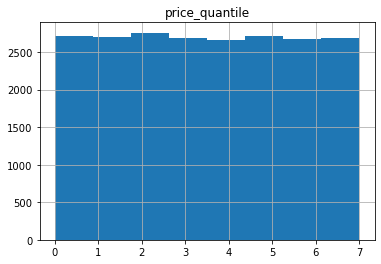

============ price_wrtMedian =============
var_price_wrtMedian = 61572402036.896904



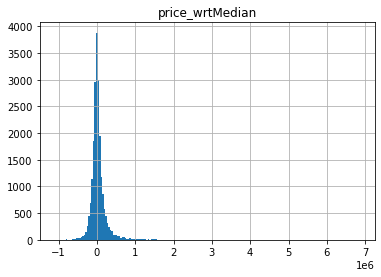

============ sfLiving_phi =============
var_sfLiving_phi = 56374778968.40702



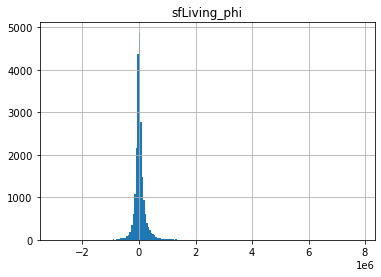

============ sfYard_phi =============
var_sfYard_phi = 1788454873455.3103



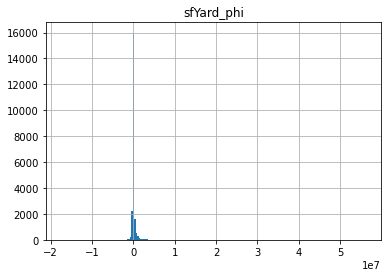

============ grade =============
var_grade = 1.3763337201284405



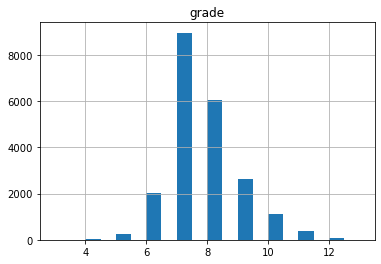

============ sqft_living =============
var_sfLiving = 842879.8274676512



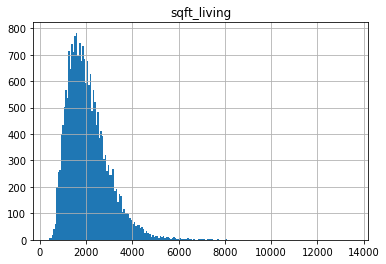

============ log10_sfLiving =============
var_log10_sfLiving = 0.03395179435867355



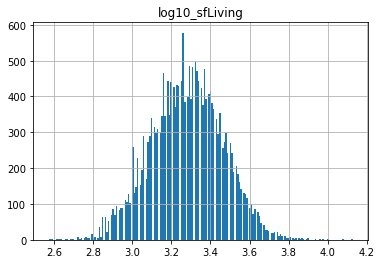

============ bathrooms =============
var_bathrooms = 0.5913094679896825



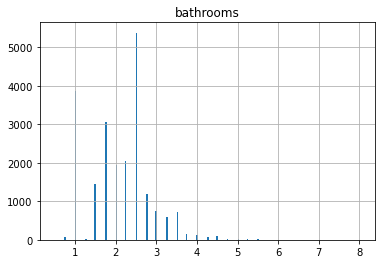

============ quarter_bathrooms =============
var_quarter_bathrooms = 9.46095148783492



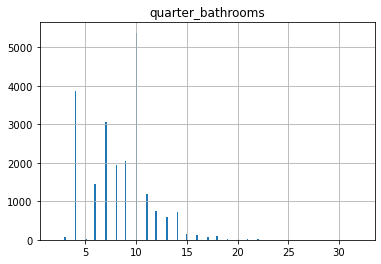

============ quarter_bathrooms_times_grade =============
var_quarter_bathrooms_times_grade = 1082.511287131796



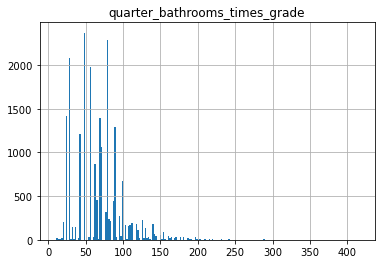

============ building_age =============
var_building_age = 862.8644255096154



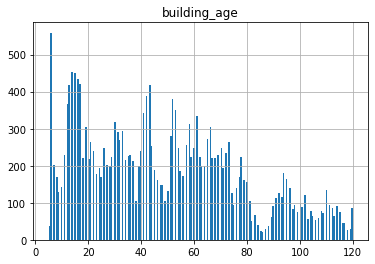

============ interior_age =============
var_interior_age = 837.7970079433651



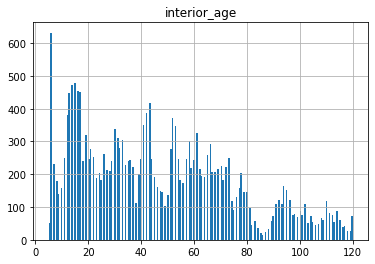

============ elevation_meters =============
var_elevation_m = 3037.74058466025



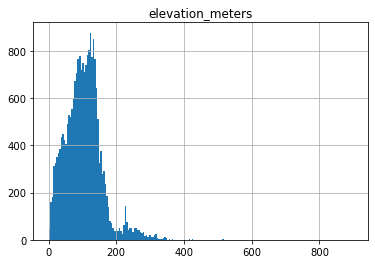

============ log10_elevation_m =============
var_log10_elevation_m = 0.0850985344010879



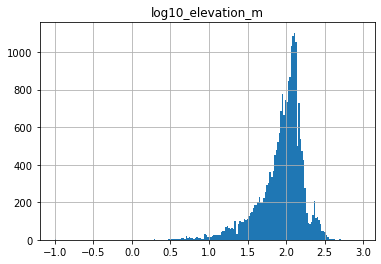

============ elevation_cm =============
var_elevation_cm = 30376829.779824793



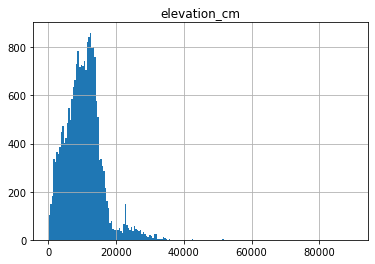

============ log10_elevation_cm =============
var_log10_elevation_cm = 0.08374050956441823



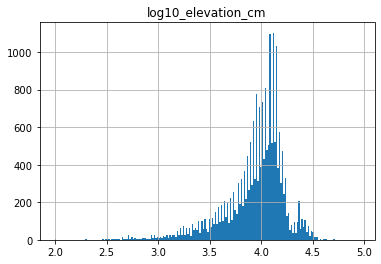

============ sales_density =============
var_sales_density = 50.99845394206731



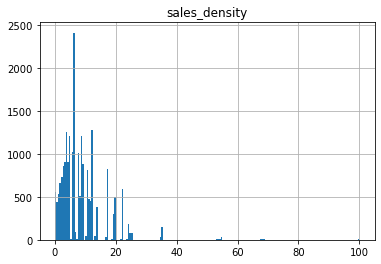

============ log10_sales_density =============
var_log10_sales_density = 0.17478072200342754



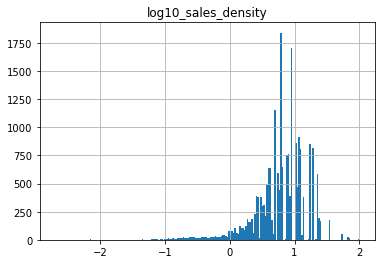

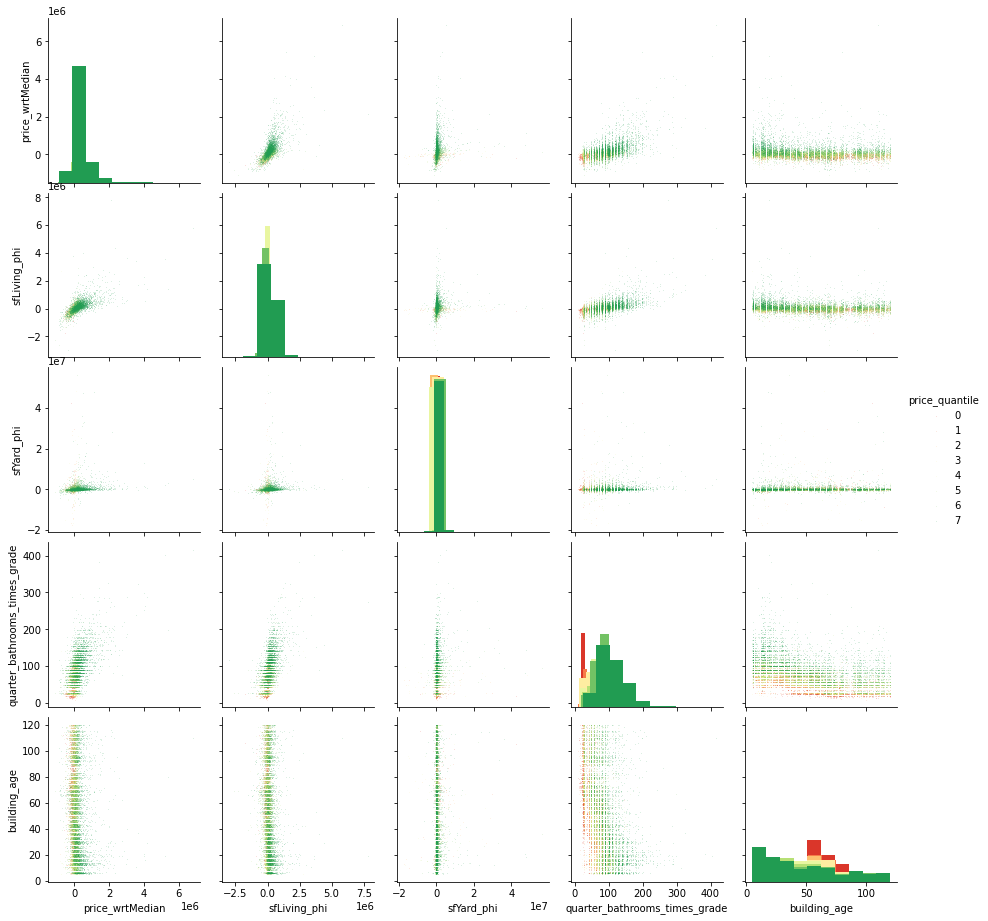

In [54]:
print(repr(df.columns))
display(df.info())


col_view = 'view'
print(f"============ {col_view} =============")
counts_view = df[col_view].value_counts(normalize=False, dropna=False)
print(f"df[{col_view}].value_counts(normalize=False, dropna=False)")
display(counts_view)
print()
print(f"repr(counts_{col_view}) = {repr(counts_view)}")
print()
print(f"counts_{col_view}.keys() = {repr(counts_view.keys())}")
print()

col_bathrooms = 'bathrooms'
print(f"============ {col_bathrooms} =============")

counts_bathrooms = df[col_bathrooms].value_counts(normalize=False, dropna=False)
print(f"df[{col_bathrooms}].value_counts(normalize=False, dropna=False)")
display(counts_bathrooms)
print()
print(f"repr(counts_{col_bathrooms}) = {repr(counts_bathrooms)}")
print()
print(f"counts_{col_bathrooms}.keys() = {repr(counts_bathrooms.keys())}")
print()


col_waterfront = 'waterfront'
print(f"============ {col_waterfront} =============")

counts_waterfront = df[col_waterfront].value_counts(normalize=False, dropna=False)
print(f"df[{col_waterfront}].value_counts(normalize=False, dropna=False)")
display(counts_waterfront)
print()
print(f"repr(counts_{col_waterfront}) = {repr(counts_waterfront)}")
print()
print(f"counts_{col_waterfront}.keys() = {repr(counts_waterfront.keys())}")
print()

col_yearBuilt = 'yr_built'
print(f"============ {col_yearBuilt} =============")

counts_yearBuilt = df[col_yearBuilt].value_counts(normalize=False, dropna=False)
counts_yearBuilt_keys = sorted(list(counts_yearBuilt.keys()))
print(f"df[{col_yearBuilt}].value_counts(normalize=False, dropna=False)")
display(counts_yearBuilt)
print()
print(f"repr(counts_{col_yearBuilt}) = {repr(counts_yearBuilt)}")
print()
print(f"counts_{col_yearBuilt}_keys = {repr(counts_yearBuilt_keys)}")
print()

col_yearReno = 'yr_renovated'
print(f"============ {col_yearReno} =============")

counts_yearReno = df[col_yearReno].value_counts(normalize=False, dropna=False)
counts_yearReno_keys = list(counts_yearReno.keys())
print(f"df[{col_yearReno}].value_counts(normalize=False, dropna=False)")
display(counts_yearReno)
print()
print(f"repr(counts_{col_yearReno}) = {repr(counts_yearReno)}")
print()
print(f"counts_{col_yearReno}_keys = {repr(counts_yearReno_keys)}")
print()

col_interior_age = 'interior_age'
print(f"============ {col_interior_age} =============")

counts_interior_age = df[col_interior_age].value_counts(normalize=False, dropna=False)
counts_interior_age_keys = list(counts_interior_age.keys())
print(f"df[{col_interior_age}].value_counts(normalize=False, dropna=False)")
display(counts_interior_age)
print()
print(f"repr(counts_{col_interior_age}) = {repr(counts_interior_age)}")
print()
print(f"counts_{col_interior_age}_keys = {repr(counts_interior_age_keys)}")
print()

col_price = 'price'
print(f"============ {col_price} =============")
event_price = df[col_price].to_list()
var_price = np.var(event_price)
print(f"var_price = {var_price}")
print()

col_log10_price = 'log10_price'
print(f"============ {col_log10_price} =============")
event_log10_price = df[col_log10_price].to_list()
var_log10_price = np.var(event_log10_price)
print(f"var_log10_price = {var_log10_price}")
print()

col_price_quantile = 'price_quantile'
num_price_quanta = 8
print(f"============ {col_price_quantile} =============")
event_price_quantile = pd.qcut(df[col_price], q=num_price_quanta, labels=False)
df[col_price_quantile] = event_price_quantile
display(df[col_price_quantile].describe())
print()
df.hist(col_price_quantile, bins=num_price_quanta)
plt.show()

col_price_wrtMedian = 'price_wrtMedian'
print(f"============ {col_price_wrtMedian} =============")
event_price_wrtMedian = df[col_price_wrtMedian].to_list()
var_price_wrtMedian = np.var(event_price_wrtMedian)
print(f"var_price_wrtMedian = {var_price_wrtMedian}")
print()
df.hist(col_price_wrtMedian, bins=200)
plt.show()

col_sfLiving_phi = 'sfLiving_phi'
print(f"============ {col_sfLiving_phi} =============")
event_sfLiving_phi = df[col_sfLiving_phi].to_list()
var_sfLiving_phi = np.var(event_sfLiving_phi)
print(f"var_sfLiving_phi = {var_sfLiving_phi}")
print()
df.hist(col_sfLiving_phi, bins=200)
plt.show()

col_sfYard_phi = 'sfYard_phi'
print(f"============ {col_sfYard_phi} =============")
event_sfYard_phi = df[col_sfYard_phi].to_list()
var_sfYard_phi = np.var(event_sfYard_phi)
print(f"var_sfYard_phi = {var_sfYard_phi}")
print()
df.hist(col_sfYard_phi, bins=200)
plt.show()

col_grade = 'grade'
print(f"============ {col_grade} =============")
event_grade = df[col_grade].to_list()
var_grade = np.var(event_grade)
print(f"var_grade = {var_grade}")
print()
df.hist(col_grade, bins=20)
plt.show()

col_sfLiving = 'sqft_living'
print(f"============ {col_sfLiving} =============")
event_sfLiving = df[col_sfLiving].to_list()
var_sfLiving = np.var(event_sfLiving)
print(f"var_sfLiving = {var_sfLiving}")
print()
df.hist(col_sfLiving, bins=200)
plt.show()

col_log10_sfLiving = 'log10_sfLiving'
print(f"============ {col_log10_sfLiving} =============")
event_log10_sfLiving = [(round(np.log10(sqft), 2) if sqft >= 10 else 1.0) for sqft in event_sfLiving]
df[col_log10_sfLiving] = event_log10_sfLiving
var_log10_sfLiving = np.var(event_log10_sfLiving)
print(f"var_log10_sfLiving = {var_log10_sfLiving}")
print()
df.hist(col_log10_sfLiving, bins=200)
plt.show()

col_bathrooms = 'bathrooms'
print(f"============ {col_bathrooms} =============")
event_bathrooms = df[col_bathrooms]
var_bathrooms = np.var(event_bathrooms)
print(f"var_bathrooms = {var_bathrooms}")
print()
df.hist(col_bathrooms, bins=200)
plt.show()

col_quarter_bathrooms = 'quarter_bathrooms'
print(f"============ {col_quarter_bathrooms} =============")
event_quarter_bathrooms = df[col_quarter_bathrooms]
var_quarter_bathrooms = np.var(event_quarter_bathrooms)
print(f"var_quarter_bathrooms = {var_quarter_bathrooms}")
print()
df.hist(col_quarter_bathrooms, bins=200)
plt.show()

col_quarter_bathrooms_times_grade = 'quarter_bathrooms_times_grade'
print(f"============ {col_quarter_bathrooms_times_grade} =============")
event_quarter_bathrooms_times_grade = [b * g for b, g in list(zip(event_quarter_bathrooms, event_grade))]
df[col_quarter_bathrooms_times_grade] = event_quarter_bathrooms_times_grade
var_quarter_bathrooms_times_grade = np.var(event_quarter_bathrooms_times_grade)
print(f"var_quarter_bathrooms_times_grade = {var_quarter_bathrooms_times_grade}")
print()
df.hist(col_quarter_bathrooms_times_grade, bins=200)
plt.show()

col_yr_built = 'yr_built'
event_yr_built = df[col_yr_built]

col_building_age = 'building_age'
print(f"============ {col_building_age} =============")
var_building_age = np.var(event_building_age)
print(f"var_building_age = {var_building_age}")
print()
df.hist(col_building_age, bins=200)
plt.show()

col_interior_age = 'interior_age'
print(f"============ {col_interior_age} =============")
var_interior_age = np.var(event_interior_age)
print(f"var_interior_age = {var_interior_age}")
print()
df.hist(col_interior_age, bins=200)
plt.show()

col_elevation_m = 'elevation_meters'
print(f"============ {col_elevation_m} =============")
event_elevation_m = df[col_elevation_m]
var_elevation_m = np.var(event_elevation_m)
print(f"var_elevation_m = {var_elevation_m}")
print()
df.hist(col_elevation_m, bins=200)
plt.show()

col_log10_elevation_m = 'log10_elevation_m'
print(f"============ {col_log10_elevation_m} =============")
event_log10_elevation_m = [(round(np.log10(elev), 2) if elev > 0.1 else np.log10(0.1)) for elev in event_elevation_meters]
df[col_log10_elevation_m] = event_log10_elevation_m
var_log10_elevation_m = np.var(event_log10_elevation_m)
print(f"var_log10_elevation_m = {var_log10_elevation_m}")
print()
df.hist(col_log10_elevation_m, bins=200)
plt.show()

col_elevation_cm = 'elevation_cm'
print(f"============ {col_elevation_cm} =============")
event_elevation_cm = [(round(100*elev_m, 0) if elev_m > 1 else 100) for elev_m in event_elevation_meters]
df[col_elevation_cm] = event_elevation_cm
var_elevation_cm = np.var(event_elevation_cm)
print(f"var_elevation_cm = {var_elevation_cm}")
print()
df.hist(col_elevation_cm, bins=200)
plt.show()

col_log10_elevation_cm = 'log10_elevation_cm'
print(f"============ {col_log10_elevation_cm} =============")
event_log10_elevation_cm = [round(np.log10(elev_cm), 2) for elev_cm in event_elevation_cm]
df[col_log10_elevation_cm] = event_log10_elevation_cm
var_log10_elevation_cm = np.var(event_log10_elevation_cm)
print(f"var_log10_elevation_cm = {var_log10_elevation_cm}")
print()
df.hist(col_log10_elevation_cm, bins=200)
plt.show()


event_sqrt_sales_density = [np.round(np.sqrt(rho), 3) for rho in event_sales_density]
df["sqrt_sales_density"] = event_sqrt_sales_density

event_log10_sales_density = [np.round(np.log10(rho), 3) for rho in event_sales_density]
df["log10_sales_density"] = event_log10_sales_density

col_sales_density = 'sales_density'
print(f"============ {col_sales_density} =============")
var_sales_density = np.var(event_sales_density)
print(f"var_sales_density = {var_sales_density}")
print()
df.hist(col_sales_density, bins=200)
plt.show()

col_log10_sales_density = 'log10_sales_density'
print(f"============ {col_log10_sales_density} =============")
var_log10_sales_density = np.var(event_log10_sales_density)
print(f"var_log10_sales_density = {var_log10_sales_density}")
print()
df.hist(col_log10_sales_density, bins=200)
plt.show()

# https://colorbrewer2.org/?type=qualitative&scheme=Paired&n=10
sns.pairplot(df, vars=[col_price_wrtMedian, 
                       col_sfLiving_phi,
                       col_sfYard_phi,
                       col_quarter_bathrooms_times_grade,
                       col_building_age],
             markers='.',
             hue=col_price_quantile,
             kind="scatter",
             plot_kws={'s':4, 'linewidth':0, 'alpha':0.2},
             diag_kind="hist",
             palette=sns.color_palette("RdYlGn", num_price_quanta)) 
plt.show()


mapbox_access_token = open(r"c:\.mapbox\access_token").read()
px.set_mapbox_access_token(mapbox_access_token)

fig = px.scatter_mapbox(df,
                        lat=col_lat,
                        lon=col_long, 
                        color=col_price_quantile,
                        size=col_building_age,
                        color_continuous_scale=px.colors.sequential.Viridis, 
                        size_max=6,
                        zoom=10)
fig.show()

In [ ]:
print(list(df.columns))

In [ ]:
x = datetime.now()

print(x.strftime("%Y-%m-%d_%H%M%S"))

In [ ]:
print(type(df))

In [ ]:
isinstance(df, pd.DataFrame)

In [ ]:
pd.Int64Dtype()

In [ ]:
v_str = "-1"
v_value = int(0)
try:
    v_numeric = pd.to_numeric(v_str, errors='raise')
    if v_numeric >= 0:
        v_value = int(v_numeric)
except:
    pass

print(f"v_value = {v_value}")
print(f"type(v_value) = {type(v_value)}")


In [ ]:
int(pd.NA)

In [ ]:
years_valid = list(range(1900,2022))
str_input = [""] + ["0"] + [str(y) for y in years_valid]

print("str_input = " + repr(str_input) )
print()

output_array = pd.array([pd.NA] + years_valid, dtype=pd.Int16Dtype())

v_str = '1981'
if int(v_str) in output_array:
    print(f"int({repr(v_str)}) is in int_array")
else:
    print(f"int({repr(v_str)} is NOT in int_array")

print(type(int_array))
print(type(int_array_NA))

display(int_array)
print()
display(int_array_NA)

In [ ]:
i = housing_convert_yrReno("")
print(f"i={i}")
print()
print(f"type(i)={type(i)}")


In [ ]:
display([int(s) for s in event_fifteen_indices[0][1:-1].split(', ')])

In [ ]:

display(event_fifteen_distances[0])
display([float(s) for s in event_fifteen_distances[0][1:-1].split(', ')])


In [6]:
print(divmod(63.99999999999999, 1))

(63.0, 0.9999999999999929)


In [24]:
tuple1 = (1,2,3,4)
thing = tuple(reversed(tuple1))
thing

(4, 3, 2, 1)

In [21]:
print(reversed([1,2,3]))